#Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime as dt
import seaborn as sns
from pandas.api.types import CategoricalDtype

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#Read Data

In [0]:
# Uploaded = files.upload()

In [0]:
# Data = pd.read_csv(io.StringIO(Uploaded['vgsales.csv'].decode('utf-8')))
# Data

#แก้ชื่อ Index และ Columns

In [0]:
url = 'https://raw.githubusercontent.com/prasertcbs/basic-dataset/master/BaskinRobbins.tsv'
Data = pd.read_table(url,
                     nrows=5) #เลือกว่าจะใช้กี่ Rows
Data

,Flavour,Calories,Total Fat (g),Trans Fat (g),Carbohydrates (g),Sugars (g),Protein (g),Sugar Alcohol (g)
0,Bananas Foster,160,8,0.2,20,16,2,NaN
1,Baseball Nut,160,9,0.2,19,13,3,NaN
2,Beavertails Pastry,170,9,0.3,21,15,3,NaN
3,Blackberry Frozen Yogurt,120,4,0.1,17,16,3,NaN
4,Blue Raspberry Sherbet,130,2,0.1,26,20,2,NaN


In [0]:
#Rename
Data.rename(columns={'Flavour': 'Flavor'})

,Flavor,Calories,Total Fat (g),Trans Fat (g),Carbohydrates (g),Sugars (g),Protein (g),Sugar Alcohol (g)
0,Bananas Foster,160,8,0.2,20,16,2,NaN
1,Baseball Nut,160,9,0.2,19,13,3,NaN
2,Beavertails Pastry,170,9,0.3,21,15,3,NaN
3,Blackberry Frozen Yogurt,120,4,0.1,17,16,3,NaN
4,Blue Raspberry Sherbet,130,2,0.1,26,20,2,NaN


In [0]:
#Rename
Data.rename(columns={'Calories': 'Cals',
                     'Carbohydrates (g)': 'Carb (g)'})

,Flavour,Cals,Total Fat (g),Trans Fat (g),Carb (g),Sugars (g),Protein (g),Sugar Alcohol (g)
0,Bananas Foster,160,8,0.2,20,16,2,NaN
1,Baseball Nut,160,9,0.2,19,13,3,NaN
2,Beavertails Pastry,170,9,0.3,21,15,3,NaN
3,Blackberry Frozen Yogurt,120,4,0.1,17,16,3,NaN
4,Blue Raspberry Sherbet,130,2,0.1,26,20,2,NaN


In [0]:
#Regular Expression
Data.columns

Index(['Flavour', 'Calories', 'Total Fat (g)', 'Trans Fat (g)',
       'Carbohydrates (g)', 'Sugars (g)', 'Protein (g)', 'Sugar Alcohol (g)'],
      dtype='object')

In [0]:
#str.replace
Data.columns = Data.columns.str.replace(r' ', '_')
Data

,Flavour,Calories,Total_Fat_(g),Trans_Fat_(g),Carbohydrates_(g),Sugars_(g),Protein_(g),Sugar_Alcohol_(g)
0,Bananas Foster,160,8,0.2,20,16,2,NaN
1,Baseball Nut,160,9,0.2,19,13,3,NaN
2,Beavertails Pastry,170,9,0.3,21,15,3,NaN
3,Blackberry Frozen Yogurt,120,4,0.1,17,16,3,NaN
4,Blue Raspberry Sherbet,130,2,0.1,26,20,2,NaN


In [0]:
#lower case
Data.columns = Data.columns.str.lower()
Data

,flavour,calories,total_fat_(g),trans_fat_(g),carbohydrates_(g),sugars_(g),protein_(g),sugar_alcohol_(g)
0,Bananas Foster,160,8,0.2,20,16,2,NaN
1,Baseball Nut,160,9,0.2,19,13,3,NaN
2,Beavertails Pastry,170,9,0.3,21,15,3,NaN
3,Blackberry Frozen Yogurt,120,4,0.1,17,16,3,NaN
4,Blue Raspberry Sherbet,130,2,0.1,26,20,2,NaN


In [0]:
#Capitalize
Data.columns = Data.columns.str.capitalize()
Data

,Flavour,Calories,Total_fat_(g),Trans_fat_(g),Carbohydrates_(g),Sugars_(g),Protein_(g),Sugar_alcohol_(g)
0,Bananas Foster,160,8,0.2,20,16,2,NaN
1,Baseball Nut,160,9,0.2,19,13,3,NaN
2,Beavertails Pastry,170,9,0.3,21,15,3,NaN
3,Blackberry Frozen Yogurt,120,4,0.1,17,16,3,NaN
4,Blue Raspberry Sherbet,130,2,0.1,26,20,2,NaN


In [0]:
#str รวม 2 คำสั่ง
Data.columns = Data.columns.str.replace(r'_', ' ').str.capitalize()
Data

,Flavour,Calories,Total fat (g),Trans fat (g),Carbohydrates (g),Sugars (g),Protein (g),Sugar alcohol (g)
0,Bananas Foster,160,8,0.2,20,16,2,NaN
1,Baseball Nut,160,9,0.2,19,13,3,NaN
2,Beavertails Pastry,170,9,0.3,21,15,3,NaN
3,Blackberry Frozen Yogurt,120,4,0.1,17,16,3,NaN
4,Blue Raspberry Sherbet,130,2,0.1,26,20,2,NaN


In [0]:
#ตั้งชื่อให้ Index & เปลี่ยนชื่อ
Data.index.names = ['id']
Data

,Flavour,Calories,Total fat (g),Trans fat (g),Carbohydrates (g),Sugars (g),Protein (g),Sugar alcohol (g)
id,,,,,,,,
0,Bananas Foster,160,8,0.2,20,16,2,NaN
1,Baseball Nut,160,9,0.2,19,13,3,NaN
2,Beavertails Pastry,170,9,0.3,21,15,3,NaN
3,Blackberry Frozen Yogurt,120,4,0.1,17,16,3,NaN
4,Blue Raspberry Sherbet,130,2,0.1,26,20,2,NaN


In [0]:
#Set_index
Data.set_index(['Flavour', 'Calories'])

,,Total fat (g),Trans fat (g),Carbohydrates (g),Sugars (g),Protein (g),Sugar alcohol (g)
Flavour,Calories,,,,,,
Bananas Foster,160,8,0.2,20,16,2,NaN
Baseball Nut,160,9,0.2,19,13,3,NaN
Beavertails Pastry,170,9,0.3,21,15,3,NaN
Blackberry Frozen Yogurt,120,4,0.1,17,16,3,NaN
Blue Raspberry Sherbet,130,2,0.1,26,20,2,NaN


In [0]:
#Rename หลายๆ Index พร้อมกัน Data.index.names=['F', 'Cal']
Data.set_index(['Flavour', 'Calories']).index.names=['F', 'Cal']


,Flavour,Calories,Total fat (g),Trans fat (g),Carbohydrates (g),Sugars (g),Protein (g),Sugar alcohol (g)
Rank,,,,,,,,
0,Bananas Foster,160,8,0.2,20,16,2,NaN
1,Baseball Nut,160,9,0.2,19,13,3,NaN
2,Beavertails Pastry,170,9,0.3,21,15,3,NaN
3,Blackberry Frozen Yogurt,120,4,0.1,17,16,3,NaN
4,Blue Raspberry Sherbet,130,2,0.1,26,20,2,NaN


#ลบ Rows และ Columns

In [0]:
url = 'https://github.com/prasertcbs/tutorial/raw/master/mtcars.csv'
Data = pd.read_csv(url)
Data.tail(10)

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
22,AMC Javelin,15.2,8,304.0,150,3.15,3.435,17.30,0,0,3,2
23,Camaro Z28,13.3,8,350.0,245,3.73,3.840,15.41,0,0,3,4
24,Pontiac Firebird,19.2,8,400.0,175,3.08,3.845,17.05,0,0,3,2
25,Fiat X1-9,27.3,4,79.0,66,4.08,1.935,18.90,1,1,4,1
26,Porsche 914-2,26.0,4,120.3,91,4.43,2.140,16.70,0,1,5,2
27,Lotus Europa,30.4,4,95.1,113,3.77,1.513,16.90,1,1,5,2
28,Ford Pantera L,15.8,8,351.0,264,4.22,3.170,14.50,0,1,5,4
29,Ferrari Dino,19.7,6,145.0,175,3.62,2.770,15.50,0,1,5,6
30,Maserati Bora,15.0,8,301.0,335,3.54,3.570,14.60,0,1,5,8
31,Volvo 142E,21.4,4,121.0,109,4.11,2.780,18.60,1,1,4,2


In [0]:
#Drop โดยใช้ Index
Data.drop(index=2).head(3)

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1


In [0]:
#Drop Columns
Data.drop(columns='hp').head(3)

,model,mpg,cyl,disp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,3.85,2.320,18.61,1,1,4,1


In [0]:
#Drop Columns หลายๆ Columns พร้อมกัน
Data.drop(columns=['hp', 'carb']).head(3)

,model,mpg,cyl,disp,drat,wt,qsec,vs,am,gear
0,Mazda RX4,21.0,6,160.0,3.90,2.620,16.46,0,1,4
1,Mazda RX4 Wag,21.0,6,160.0,3.90,2.875,17.02,0,1,4
2,Datsun 710,22.8,4,108.0,3.85,2.320,18.61,1,1,4


#ลบตัวซ้ำ

In [0]:
url = 'https://github.com/prasertcbs/tutorial/raw/master/duplicates.csv'
Data = pd.read_csv(url)
Data

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,toyota,4runner 4wd,2.7,1999,4,auto(l4),4,16,20,r,suv
1,audi,a4 quattro,1.8,1999,4,manual(m5),4,18,26,p,compact
2,audi,a4 quattro,1.8,2008,4,manual(m5),4,18,26,p,compact
3,nissan,altima,2.4,1999,4,auto(l4),f,19,27,r,compact
4,toyota,4runner 4wd,2.7,1999,4,auto(l4),4,16,20,r,suv
5,nissan,altima,2.5,2008,4,manual(m6),f,23,32,r,midsize
6,jeep,grand cherokee 4wd,4.7,2008,8,auto(l5),4,14,19,r,suv
7,lincoln,navigator 2wd,5.4,1999,8,auto(l4),r,11,17,r,suv
8,dodge,ram 1500 pickup 4wd,5.2,1999,8,auto(l4),4,11,15,r,pickup
9,hyundai,sonata,2.4,2008,4,manual(m5),f,21,31,r,midsize


In [0]:
Data[Data.duplicated('manufacturer')] #แค่ Columns เดียวซ้ำกัน ก็คือซ้้ำแล้ว

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
2,audi,a4 quattro,1.8,2008,4,manual(m5),4,18,26,p,compact
4,toyota,4runner 4wd,2.7,1999,4,auto(l4),4,16,20,r,suv
5,nissan,altima,2.5,2008,4,manual(m6),f,23,32,r,midsize
10,lincoln,navigator 2wd,5.4,1999,8,auto(l4),r,11,17,r,suv


In [0]:
Data[Data.duplicated()] #ต้องซ้ำกันทุก Columns ถึงจะเรียกว่าซ้ำ

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
4,toyota,4runner 4wd,2.7,1999,4,auto(l4),4,16,20,r,suv
10,lincoln,navigator 2wd,5.4,1999,8,auto(l4),r,11,17,r,suv


In [0]:
Data.drop_duplicates() #ต้องเหมือนกันทุก Columns ถึงจะโดน Drop

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,toyota,4runner 4wd,2.7,1999,4,auto(l4),4,16,20,r,suv
1,audi,a4 quattro,1.8,1999,4,manual(m5),4,18,26,p,compact
2,audi,a4 quattro,1.8,2008,4,manual(m5),4,18,26,p,compact
3,nissan,altima,2.4,1999,4,auto(l4),f,19,27,r,compact
5,nissan,altima,2.5,2008,4,manual(m6),f,23,32,r,midsize
6,jeep,grand cherokee 4wd,4.7,2008,8,auto(l5),4,14,19,r,suv
7,lincoln,navigator 2wd,5.4,1999,8,auto(l4),r,11,17,r,suv
8,dodge,ram 1500 pickup 4wd,5.2,1999,8,auto(l4),4,11,15,r,pickup
9,hyundai,sonata,2.4,2008,4,manual(m5),f,21,31,r,midsize


In [0]:
Data.drop_duplicates(subset=['class', 'year']) #เราเลือก Subset ได้ว่าจะเลือกใช้ Columns ไหนบ้าง

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,toyota,4runner 4wd,2.7,1999,4,auto(l4),4,16,20,r,suv
1,audi,a4 quattro,1.8,1999,4,manual(m5),4,18,26,p,compact
2,audi,a4 quattro,1.8,2008,4,manual(m5),4,18,26,p,compact
5,nissan,altima,2.5,2008,4,manual(m6),f,23,32,r,midsize
6,jeep,grand cherokee 4wd,4.7,2008,8,auto(l5),4,14,19,r,suv
8,dodge,ram 1500 pickup 4wd,5.2,1999,8,auto(l4),4,11,15,r,pickup


#จัดการกับ Missing Value Part1

In [0]:
url = 'https://github.com/prasertcbs/tutorial/raw/master/msleep.csv'
Data = pd.read_csv(url)
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83 entries, 0 to 82
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          83 non-null     object 
 1   genus         83 non-null     object 
 2   vore          76 non-null     object 
 3   order         83 non-null     object 
 4   conservation  54 non-null     object 
 5   sleep_total   83 non-null     float64
 6   sleep_rem     61 non-null     float64
 7   sleep_cycle   32 non-null     float64
 8   awake         83 non-null     float64
 9   brainwt       56 non-null     float64
 10  bodywt        83 non-null     float64
dtypes: float64(6), object(5)
memory usage: 7.3+ KB


In [0]:
#Drop Rows
Data.dropna() #Default axis = 0คือจะลบ Rows

,name,genus,vore,order,conservation,sleep_total,sleep_rem,sleep_cycle,awake,brainwt,bodywt
3,Greater short-tailed shrew,Blarina,omni,Soricomorpha,lc,14.9,2.3,0.133333,9.1,0.00029,0.019
4,Cow,Bos,herbi,Artiodactyla,domesticated,4.0,0.7,0.666667,20.0,0.42300,600.000
8,Dog,Canis,carni,Carnivora,domesticated,10.1,2.9,0.333333,13.9,0.07000,14.000
11,Guinea pig,Cavis,herbi,Rodentia,domesticated,9.4,0.8,0.216667,14.6,0.00550,0.728
13,Chinchilla,Chinchilla,herbi,Rodentia,domesticated,12.5,1.5,0.116667,11.5,0.00640,0.420
16,Lesser short-tailed shrew,Cryptotis,omni,Soricomorpha,lc,9.1,1.4,0.150000,14.9,0.00014,0.005
17,Long-nosed armadillo,Dasypus,carni,Cingulata,lc,17.4,3.1,0.383333,6.6,0.01080,3.500
19,North American Opossum,Didelphis,omni,Didelphimorphia,lc,18.0,4.9,0.333333,6.0,0.00630,1.700
21,Big brown bat,Eptesicus,insecti,Chiroptera,lc,19.7,3.9,0.116667,4.3,0.00030,0.023
22,Horse,Equus,herbi,Perissodactyla,domesticated,2.9,0.6,1.000000,21.1,0.65500,521.000


In [0]:
#Drop Columns
Data.dropna(axis=1) #axis=1 คือ Drop Columns

,name,genus,order,sleep_total,awake,bodywt
0,Cheetah,Acinonyx,Carnivora,12.1,11.9,50.000
1,Owl monkey,Aotus,Primates,17.0,7.0,0.480
2,Mountain beaver,Aplodontia,Rodentia,14.4,9.6,1.350
3,Greater short-tailed shrew,Blarina,Soricomorpha,14.9,9.1,0.019
4,Cow,Bos,Artiodactyla,4.0,20.0,600.000
...,...,...,...,...,...,...
78,Tree shrew,Tupaia,Scandentia,8.9,15.1,0.104
79,Bottle-nosed dolphin,Tursiops,Cetacea,5.2,18.8,173.330
80,Genet,Genetta,Carnivora,6.3,17.7,2.000
81,Arctic fox,Vulpes,Carnivora,12.5,11.5,3.380


In [0]:
#dropna เลือก Columns ที่จะ Drop ไม่ได้
# Data.dropna('sleep_rem',
#             axis=1)

TypeError: ignored

#จัดการกับ Missing Value Part2

In [0]:
url = 'https://github.com/prasertcbs/tutorial/raw/master/qnaire_missing_values.csv'
Data = pd.read_csv(url,
                   index_col='obs') #กำหนด index โดยใช้ Coumns
Data

,gender,age,eq1,eq2,eq3,eq4,eq5,eq6,eq7,eq8,eq9,eq10
obs,,,,,,,,,,,,
1,M,37.0,1.0,5.0,2.0,1.0,1.0,5.0,3.0,5.0,4.0,2.0
2,F,NaN,NaN,1.0,4.0,1.0,1.0,2.0,3.0,5.0,4.0,2.0
3,NaN,29.0,2.0,5.0,NaN,2.0,5.0,NaN,3.0,3.0,1.0,1.0
4,M,25.0,5.0,2.0,4.0,NaN,4.0,4.0,2.0,4.0,4.0,1.0
5,F,19.0,1.0,5.0,4.0,4.0,5.0,2.0,3.0,2.0,2.0,1.0
6,NaN,26.0,4.0,5.0,NaN,2.0,4.0,2.0,NaN,NaN,NaN,3.0
7,F,NaN,3.0,2.0,3.0,5.0,1.0,1.0,2.0,3.0,4.0,4.0
8,F,40.0,5.0,2.0,3.0,1.0,2.0,NaN,2.0,1.0,3.0,NaN
9,M,39.0,5.0,NaN,NaN,2.0,2.0,2.0,3.0,1.0,2.0,5.0


In [0]:
#Dropna ไม่ครบทุก Rows โดยมีเงื่อนไขว่าต้องกรอกมีข้อมูล >= กี่ตัวขึ้นไป (Thresh)
Data.dropna(thresh=10)

,gender,age,eq1,eq2,eq3,eq4,eq5,eq6,eq7,eq8,eq9,eq10
obs,,,,,,,,,,,,
1,M,37.0,1.0,5.0,2.0,1.0,1.0,5.0,3.0,5.0,4.0,2.0
2,F,NaN,NaN,1.0,4.0,1.0,1.0,2.0,3.0,5.0,4.0,2.0
4,M,25.0,5.0,2.0,4.0,NaN,4.0,4.0,2.0,4.0,4.0,1.0
5,F,19.0,1.0,5.0,4.0,4.0,5.0,2.0,3.0,2.0,2.0,1.0
7,F,NaN,3.0,2.0,3.0,5.0,1.0,1.0,2.0,3.0,4.0,4.0
8,F,40.0,5.0,2.0,3.0,1.0,2.0,NaN,2.0,1.0,3.0,NaN
9,M,39.0,5.0,NaN,NaN,2.0,2.0,2.0,3.0,1.0,2.0,5.0
10,NaN,NaN,5.0,4.0,1.0,5.0,4.0,5.0,5.0,3.0,4.0,1.0
12,F,29.0,3.0,4.0,2.0,2.0,2.0,2.0,1.0,5.0,3.0,4.0


In [0]:
#Dropna Columns แบบมี Thresh แต่ไม่ได้ยกเว้น Columns ไหน
Data.dropna(thresh=13, #ต้องมี non-null อยู่กี่ตัวถึงจะไม่โดน Drop
            axis=1)

,eq1,eq5,eq7,eq8,eq9,eq10
obs,,,,,,
1,1.0,1.0,3.0,5.0,4.0,2.0
2,NaN,1.0,3.0,5.0,4.0,2.0
3,2.0,5.0,3.0,3.0,1.0,1.0
4,5.0,4.0,2.0,4.0,4.0,1.0
5,1.0,5.0,3.0,2.0,2.0,1.0
6,4.0,4.0,NaN,NaN,NaN,3.0
7,3.0,1.0,2.0,3.0,4.0,4.0
8,5.0,2.0,2.0,1.0,3.0,NaN
9,5.0,2.0,3.0,1.0,2.0,5.0


In [0]:
#Dropna ในแนว Rows แบบกำหนด Columns ที่มี NaN
Data.dropna(axis=0,
            thresh=8,
            subset=['eq1', 'eq2', 'eq3', 'eq4', 'eq5', 'eq6', 'eq7', 'eq8', 'eq9', 'eq10']) #thresh 8 จะถูกเอามาใช้กับแค่ eq1 - eq10 เท่านั้น จะไม่ใช้กับ gender, age

,gender,age,eq1,eq2,eq3,eq4,eq5,eq6,eq7,eq8,eq9,eq10
obs,,,,,,,,,,,,
1,M,37.0,1.0,5.0,2.0,1.0,1.0,5.0,3.0,5.0,4.0,2.0
2,F,NaN,NaN,1.0,4.0,1.0,1.0,2.0,3.0,5.0,4.0,2.0
3,NaN,29.0,2.0,5.0,NaN,2.0,5.0,NaN,3.0,3.0,1.0,1.0
4,M,25.0,5.0,2.0,4.0,NaN,4.0,4.0,2.0,4.0,4.0,1.0
5,F,19.0,1.0,5.0,4.0,4.0,5.0,2.0,3.0,2.0,2.0,1.0
7,F,NaN,3.0,2.0,3.0,5.0,1.0,1.0,2.0,3.0,4.0,4.0
8,F,40.0,5.0,2.0,3.0,1.0,2.0,NaN,2.0,1.0,3.0,NaN
9,M,39.0,5.0,NaN,NaN,2.0,2.0,2.0,3.0,1.0,2.0,5.0
10,NaN,NaN,5.0,4.0,1.0,5.0,4.0,5.0,5.0,3.0,4.0,1.0


In [0]:
#วิธีการดูชื่อ Columns ที่มีคำว่า 'eq' อยู่ในชื่อ
Data.columns[Data.columns.str.contains('eq')]

Index(['eq1', 'eq2', 'eq3', 'eq4', 'eq5', 'eq6', 'eq7', 'eq8', 'eq9', 'eq10'], dtype='object')

In [0]:
#เราสามารถเอา Columns ที่มีตัว 'eq' ไปใส่ใน Subset ได้เหมือนกัน จะได้ผลลัพท์เหมือนด้านบน
Data.dropna(thresh=8,
            subset=Data.columns[Data.columns.str.contains('eq')])

,gender,age,eq1,eq2,eq3,eq4,eq5,eq6,eq7,eq8,eq9,eq10
obs,,,,,,,,,,,,
1,M,37.0,1.0,5.0,2.0,1.0,1.0,5.0,3.0,5.0,4.0,2.0
2,F,NaN,NaN,1.0,4.0,1.0,1.0,2.0,3.0,5.0,4.0,2.0
3,NaN,29.0,2.0,5.0,NaN,2.0,5.0,NaN,3.0,3.0,1.0,1.0
4,M,25.0,5.0,2.0,4.0,NaN,4.0,4.0,2.0,4.0,4.0,1.0
5,F,19.0,1.0,5.0,4.0,4.0,5.0,2.0,3.0,2.0,2.0,1.0
7,F,NaN,3.0,2.0,3.0,5.0,1.0,1.0,2.0,3.0,4.0,4.0
8,F,40.0,5.0,2.0,3.0,1.0,2.0,NaN,2.0,1.0,3.0,NaN
9,M,39.0,5.0,NaN,NaN,2.0,2.0,2.0,3.0,1.0,2.0,5.0
10,NaN,NaN,5.0,4.0,1.0,5.0,4.0,5.0,5.0,3.0,4.0,1.0


#Missing Value Filling

In [0]:
url = 'https://github.com/prasertcbs/tutorial/raw/master/qnaire_fill_missing.tsv'
Data = pd.read_table(url,
                     index_col='obs',
                     parse_dates=['dob']) #เอาไว้แปลงค่า D M Y จาก String เป็น Time Stamp
Data

,gender,dob,salary,own_house,own_car,csi1,csi2,csi3,csi4,q1,q2,q3
obs,,,,,,,,,,,,
1,M,1997-09-17,223700.0,True,False,NaN,NaN,NaN,3.0,2.0,3.0,4
2,NaN,2001-01-16,121100.0,True,NaN,2.0,NaN,3.0,NaN,2.0,2.0,4
3,F,NaT,NaN,NaN,False,5.0,5.0,5.0,3.0,4.0,4.0,5
4,F,1995-12-04,79900.0,False,NaN,NaN,5.0,4.0,1.0,NaN,3.0,5
5,M,2001-04-12,32800.0,False,True,4.0,1.0,NaN,2.0,3.0,2.0,4
6,F,NaT,NaN,True,False,5.0,NaN,2.0,NaN,1.0,NaN,3
7,NaN,2002-12-13,272500.0,False,False,1.0,1.0,NaN,2.0,3.0,4.0,3
8,NaN,1999-07-24,41600.0,False,False,1.0,4.0,1.0,NaN,NaN,NaN,5
9,M,2003-02-20,141300.0,True,False,2.0,NaN,4.0,3.0,1.0,4.0,2


In [0]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 1 to 10
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   gender     7 non-null      object        
 1   dob        8 non-null      datetime64[ns]
 2   salary     8 non-null      float64       
 3   own_house  9 non-null      object        
 4   own_car    8 non-null      object        
 5   csi1       8 non-null      float64       
 6   csi2       6 non-null      float64       
 7   csi3       6 non-null      float64       
 8   csi4       7 non-null      float64       
 9   q1         8 non-null      float64       
 10  q2         8 non-null      float64       
 11  q3         10 non-null     int64         
dtypes: datetime64[ns](1), float64(7), int64(1), object(3)
memory usage: 1.3+ KB


In [0]:
#วิธีเชคว่า Columns นี้มี NaN อยู่กี่ตัว
Data['salary'].isnull().sum()

2

In [0]:
#Fill Na ด้วย Mean
Data['salary'].fillna(round(Data['salary'].mean(), 0),
                      inplace=True)
Data

,gender,dob,salary,own_house,own_car,csi1,csi2,csi3,csi4,q1,q2,q3
obs,,,,,,,,,,,,
1,M,1997-09-17,223700.0,True,False,NaN,NaN,NaN,3.0,2.0,3.0,4
2,NaN,2001-01-16,121100.0,True,NaN,2.0,NaN,3.0,NaN,2.0,2.0,4
3,F,NaT,122612.0,NaN,False,5.0,5.0,5.0,3.0,4.0,4.0,5
4,F,1995-12-04,79900.0,False,NaN,NaN,5.0,4.0,1.0,NaN,3.0,5
5,M,2001-04-12,32800.0,False,True,4.0,1.0,NaN,2.0,3.0,2.0,4
6,F,NaT,122612.0,True,False,5.0,NaN,2.0,NaN,1.0,NaN,3
7,NaN,2002-12-13,272500.0,False,False,1.0,1.0,NaN,2.0,3.0,4.0,3
8,NaN,1999-07-24,41600.0,False,False,1.0,4.0,1.0,NaN,NaN,NaN,5
9,M,2003-02-20,141300.0,True,False,2.0,NaN,4.0,3.0,1.0,4.0,2


In [0]:
Data['own_car'].value_counts()

False    7
True     1
Name: own_car, dtype: int64

In [0]:
Data['own_house'].value_counts()

True     5
False    4
Name: own_house, dtype: int64

In [0]:
#Fill na ด้วย Boolean โดยดูจากส่วนใหญ่ว่า True or False
Data['own_car'].fillna(False,
                       inplace=True)
Data

,gender,dob,salary,own_house,own_car,csi1,csi2,csi3,csi4,q1,q2,q3
obs,,,,,,,,,,,,
1,M,1997-09-17,223700.0,True,False,NaN,NaN,NaN,3.0,2.0,3.0,4
2,NaN,2001-01-16,121100.0,True,False,2.0,NaN,3.0,NaN,2.0,2.0,4
3,F,NaT,122612.0,NaN,False,5.0,5.0,5.0,3.0,4.0,4.0,5
4,F,1995-12-04,79900.0,False,False,NaN,5.0,4.0,1.0,NaN,3.0,5
5,M,2001-04-12,32800.0,False,True,4.0,1.0,NaN,2.0,3.0,2.0,4
6,F,NaT,122612.0,True,False,5.0,NaN,2.0,NaN,1.0,NaN,3
7,NaN,2002-12-13,272500.0,False,False,1.0,1.0,NaN,2.0,3.0,4.0,3
8,NaN,1999-07-24,41600.0,False,False,1.0,4.0,1.0,NaN,NaN,NaN,5
9,M,2003-02-20,141300.0,True,False,2.0,NaN,4.0,3.0,1.0,4.0,2


In [0]:
Data['own_house'].fillna(False,
                         inplace=True)
Data

,gender,dob,salary,own_house,own_car,csi1,csi2,csi3,csi4,q1,q2,q3
obs,,,,,,,,,,,,
1,M,1997-09-17,223700.0,True,False,NaN,NaN,NaN,3.0,2.0,3.0,4
2,NaN,2001-01-16,121100.0,True,False,2.0,NaN,3.0,NaN,2.0,2.0,4
3,F,NaT,122612.0,False,False,5.0,5.0,5.0,3.0,4.0,4.0,5
4,F,1995-12-04,79900.0,False,False,NaN,5.0,4.0,1.0,NaN,3.0,5
5,M,2001-04-12,32800.0,False,True,4.0,1.0,NaN,2.0,3.0,2.0,4
6,F,NaT,122612.0,True,False,5.0,NaN,2.0,NaN,1.0,NaN,3
7,NaN,2002-12-13,272500.0,False,False,1.0,1.0,NaN,2.0,3.0,4.0,3
8,NaN,1999-07-24,41600.0,False,False,1.0,4.0,1.0,NaN,NaN,NaN,5
9,M,2003-02-20,141300.0,True,False,2.0,NaN,4.0,3.0,1.0,4.0,2


In [0]:
Data.mean()

salary       122612.400000
own_house         0.500000
own_car           0.100000
csi1              3.000000
csi2              3.500000
csi3              3.166667
csi4              2.428571
q1                2.250000
q2                2.875000
q3                3.700000
dtype: float64

In [0]:
#วิธี Fill na หลายๆ Column พร้อมกันโดยใช้ Mean
Data.fillna(round(Data.mean(), 0)['csi1':'q3'],
            inplace=True)
Data

,gender,dob,salary,own_house,own_car,csi1,csi2,csi3,csi4,q1,q2,q3
obs,,,,,,,,,,,,
1,M,1997-09-17,223700.0,True,False,3.0,4.0,3.0,3.0,2.0,3.0,4
2,NaN,2001-01-16,121100.0,True,False,2.0,4.0,3.0,2.0,2.0,2.0,4
3,F,NaT,122612.0,False,False,5.0,5.0,5.0,3.0,4.0,4.0,5
4,F,1995-12-04,79900.0,False,False,3.0,5.0,4.0,1.0,2.0,3.0,5
5,M,2001-04-12,32800.0,False,True,4.0,1.0,3.0,2.0,3.0,2.0,4
6,F,NaT,122612.0,True,False,5.0,4.0,2.0,2.0,1.0,3.0,3
7,NaN,2002-12-13,272500.0,False,False,1.0,1.0,3.0,2.0,3.0,4.0,3
8,NaN,1999-07-24,41600.0,False,False,1.0,4.0,1.0,2.0,2.0,3.0,5
9,M,2003-02-20,141300.0,True,False,2.0,4.0,4.0,3.0,1.0,4.0,2


In [0]:
#เปลี่ยนชื่อค่าในแต่ละ Columns
Data['gender'].replace({'M': 'Male',
                        'F': 'Female'},
                       inplace=True)
Data

,gender,dob,salary,own_house,own_car,csi1,csi2,csi3,csi4,q1,q2,q3
obs,,,,,,,,,,,,
1,Male,1997-09-17,223700.0,True,False,3.0,4.0,3.0,3.0,2.0,3.0,4
2,NaN,2001-01-16,121100.0,True,False,2.0,4.0,3.0,2.0,2.0,2.0,4
3,Female,NaT,122612.0,False,False,5.0,5.0,5.0,3.0,4.0,4.0,5
4,Female,1995-12-04,79900.0,False,False,3.0,5.0,4.0,1.0,2.0,3.0,5
5,Male,2001-04-12,32800.0,False,True,4.0,1.0,3.0,2.0,3.0,2.0,4
6,Female,NaT,122612.0,True,False,5.0,4.0,2.0,2.0,1.0,3.0,3
7,NaN,2002-12-13,272500.0,False,False,1.0,1.0,3.0,2.0,3.0,4.0,3
8,NaN,1999-07-24,41600.0,False,False,1.0,4.0,1.0,2.0,2.0,3.0,5
9,Male,2003-02-20,141300.0,True,False,2.0,4.0,4.0,3.0,1.0,4.0,2


In [0]:
#ใส่ Datetime ลงไปแล้วให้ข้อมูลไม่ใช่ String แต่เป็น Timestamp
Data['dob'].fillna(pd.to_datetime('1990-12-23'),
                   inplace=True)
Data

,gender,dob,salary,own_house,own_car,csi1,csi2,csi3,csi4,q1,q2,q3
obs,,,,,,,,,,,,
1,Male,1997-09-17,223700.0,True,False,3.0,4.0,3.0,3.0,2.0,3.0,4
2,NaN,2001-01-16,121100.0,True,False,2.0,4.0,3.0,2.0,2.0,2.0,4
3,Female,1990-12-23,122612.0,False,False,5.0,5.0,5.0,3.0,4.0,4.0,5
4,Female,1995-12-04,79900.0,False,False,3.0,5.0,4.0,1.0,2.0,3.0,5
5,Male,2001-04-12,32800.0,False,True,4.0,1.0,3.0,2.0,3.0,2.0,4
6,Female,1990-12-23,122612.0,True,False,5.0,4.0,2.0,2.0,1.0,3.0,3
7,NaN,2002-12-13,272500.0,False,False,1.0,1.0,3.0,2.0,3.0,4.0,3
8,NaN,1999-07-24,41600.0,False,False,1.0,4.0,1.0,2.0,2.0,3.0,5
9,Male,2003-02-20,141300.0,True,False,2.0,4.0,4.0,3.0,1.0,4.0,2


In [0]:
Data.isnull()

,gender,dob,salary,own_house,own_car,csi1,csi2,csi3,csi4,q1,q2,q3
obs,,,,,,,,,,,,
1,False,False,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False
7,True,False,False,False,False,False,False,False,False,False,False,False
8,True,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False


#Pivot Table

In [0]:
url = 'https://github.com/prasertcbs/tutorial/raw/master/mpg.csv'
Data = pd.read_csv(url)
Data

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
229,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
230,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
231,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
232,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


In [0]:
DataPivot = Data.pivot_table(index='class',
                 columns='drv',
                 values='model', #model เป็น String ไม่สามารถหา Mean ได้เลยต้องกำหนด aggfunc เป็น count เพราะ Defualt เป็น mean
                 fill_value=0, #เปลี่ยนค่า NaN เป็น 0
                 aggfunc='count',
                 margins=True, #สร้าง Margin (Columns เพิ่ม)
                 margins_name='Grand Total'
                 ).astype('int') #เปลี่ยน Data Type ของข้อมูลด้านใน
DataPivot

drv,4,f,r,Grand Total
class,,,,
2seater,0,0,5,5
compact,12,35,0,47
midsize,3,38,0,41
minivan,0,11,0,11
pickup,33,0,0,33
subcompact,4,22,9,35
suv,51,0,11,62
Grand Total,103,106,25,234


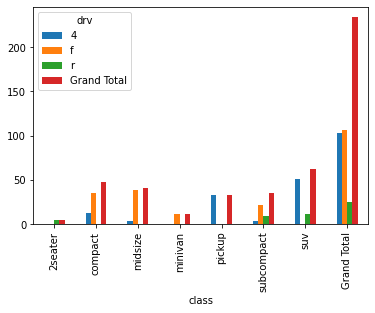

In [0]:
#Plot กราฟโดยใช้ Pandas
DataPivot.plot(kind='bar')

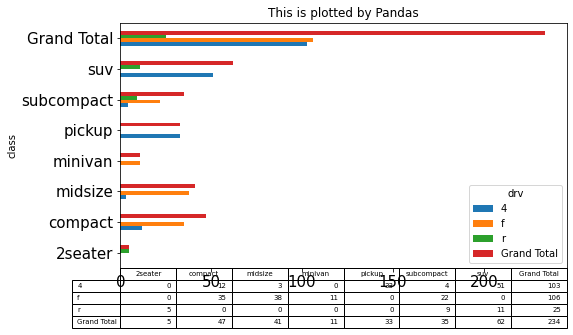

In [0]:
DataPivot.plot(kind='barh',
               figsize=(8, 4.5),
               title='This is plotted by Pandas',
               fontsize=15,
               table=True)

In [0]:
#สร้าง Pivot Table แบบมีหลายๆ Values
Data.pivot_table(index='class',
                 columns='drv',
                 values=['cty', 'hwy'],
                 fill_value=0).round(2)

cty                  hwy              
drv             4      f      r      4      f      r
class                                               
2seater      0.00   0.00  15.40   0.00   0.00  24.80
compact     18.00  20.86   0.00  25.83  29.14   0.00
midsize     16.00  18.97   0.00  24.00  27.55   0.00
minivan      0.00  15.82   0.00   0.00  22.36   0.00
pickup      13.00   0.00   0.00  16.88   0.00   0.00
subcompact  19.50  22.36  15.89  26.00  30.55  23.22
suv         13.82   0.00  12.00  18.27   0.00  17.45

#ใช้ Series.str.replace เพื่อ Clean Data
https://en.wikipedia.org/wiki/List_of_tallest_buildings_in_Thailand

In [0]:
url = 'https://en.wikipedia.org/wiki/List_of_tallest_buildings_in_Thailand'
Data = pd.read_html(url,
                    header=0)
Data

[Empty DataFrame
 Columns: [Unnamed: 0, This article includes a list of references, but its sources remain unclear because it has insufficient inline citations. Please help to improve this article by introducing more precise citations. (January 2012) (Learn how and when to remove this template message)]
 Index: [],
      Rank                                     Building  ... Floors Complete
 0       1     Magnolias Waterfront Residences Iconsiam  ...     70     2018
 1       2                        King Power MahaNakhon  ...     78     2016
 2       3       Four Season Private Residences Bangkok  ...     73     2019
 3       4                             Baiyoke Tower II  ...     85     1997
 4       5  The Residences at Mandarin Oriental Bangkok  ...     52     2018
 ..    ...                                          ...  ...    ...      ...
 147  148=                 The Saint Residences Tower I  ...     41     2018
 148  148=                The Saint Residences Tower II  ...     41

In [0]:
len(Data) #หน้านี้มีทั้งหมด 11 ตาราง

11

In [0]:
#อ่าน Data โดยกำหนดให้มีบางเงื่อนไขที่ Match กัน
Data = pd.read_html(url,
                    match='Height')
len(Data) #มีตารางที่ Match อยู่ 7 ตาราง เลยสุ่มเอาเลยง่ายกว่า

7

In [0]:
#แล้วก็ค่อยๆหาเอาว่าเอาตารางไหน
Data[1].head()

,Rank,Building,Location,Province,Height,Height.1,Floors,Will Finish
0,1,Singnature Tower,Pathum Wan,Bangkok,437 m,1435 ft,92,2026
1,2,One Bangkok Office & Hotel Tower I,Pathum Wan,Bangkok,285 m,934 ft,60,2025
2,3,One Bangkok Residential Tower III,Pathum Wan,Bangkok,278 m,912 ft,61,2024
3,4,One City Centre,Pathum Wan,Bangkok,275 m,902 ft,61,2023
4,5,One Bangkok Office Tower II,Pathum Wan,Bangkok,274 m,900 ft,58,2023


In [0]:
#Drop Columns ที่ไม่ใช้
Data = Data[1].drop('Height.1',
                    axis=1)
Data

,Rank,Building,Location,Province,Height,Floors,Will Finish
0,1,Singnature Tower,Pathum Wan,Bangkok,437 m,92,2026
1,2,One Bangkok Office & Hotel Tower I,Pathum Wan,Bangkok,285 m,60,2025
2,3,One Bangkok Residential Tower III,Pathum Wan,Bangkok,278 m,61,2024
3,4,One City Centre,Pathum Wan,Bangkok,275 m,61,2023
4,5,One Bangkok Office Tower II,Pathum Wan,Bangkok,274 m,58,2023
5,6,One Bangkok Office Tower I,Pathum Wan,Bangkok,264 m,50,2024
6,7,One Bangkok Residential Tower V,Pathum Wan,Bangkok,251 m,65,2025
7,8=,One9Five Asoke-Rama 9 Tower I,Huai Khwang,Bangkok,248 m,61,2021
8,8=,One9Five Asoke-Rama 9 Tower II,Huai Khwang,Bangkok,248 m,61,2021
9,10,The Unicorn Phayathai,Ratchathewi,Bangkok,240 m,55,2022


**Regular Expression**

\d	ตัวเลข 0-9<br>
\D	ตัวอื่นนอกจากตัวเลข 0-9<br>
\t	แท็บ<br>
\n	ขึ้นบรรทัดใหม่<br>
\s	สเปซบาร์หรือแท็บหรือขึ้นบรรทัดใหม่<br>
\S	ตัวอื่นนอกจากสเปซบาร์หรือแท็บหรือขึ้นบรรทัดใหม่<br>
\w	ตัวเลขและอักษรที่ใช้สร้างคำในภาษาต่างๆ รวมถึงขีดล่าง (_) <br>ไม่รวมสัญลักษณ์อื่นๆ<br>
\W	ตัวอื่นที่ไม่ใช่ \w<br>
. (จุด)	แทนตัวอักษรอะไรก็ได้

In [0]:
#Rank เป็นเฉพาะตัวเลข เราเลยจะตัดตัวที่ไม่ใช่ตัวเลขออก ใช้ \D และจะ dropna ด้วย
Data['Rank'] = Data['Rank'].str.replace('\D', '') #\D คืออะไรที่ไม่ใช่ตัวเลข จะถูกใช้ใน Function Replace
Data.tail(3)

,Rank,Building,Location,Province,Height,Floors,Will Finish
27,28,Hilton Garden Inn Iconsiam,Khlong San,Bangkok,155 m,29,2022
28,29,Vanissa Building,Pathum Wan,Bangkok,153 m,22,2022
29,NaN,Park Origin Ratchathewi,Ratchathewi,Bangkok,NaN,41,2023


In [0]:
Data.dropna(inplace=True)
Data

,Rank,Building,Location,Province,Height,Floors,Will Finish
0,1,Singnature Tower,Pathum Wan,Bangkok,437 m,92,2026
1,2,One Bangkok Office & Hotel Tower I,Pathum Wan,Bangkok,285 m,60,2025
2,3,One Bangkok Residential Tower III,Pathum Wan,Bangkok,278 m,61,2024
3,4,One City Centre,Pathum Wan,Bangkok,275 m,61,2023
4,5,One Bangkok Office Tower II,Pathum Wan,Bangkok,274 m,58,2023
5,6,One Bangkok Office Tower I,Pathum Wan,Bangkok,264 m,50,2024
6,7,One Bangkok Residential Tower V,Pathum Wan,Bangkok,251 m,65,2025
7,8,One9Five Asoke-Rama 9 Tower I,Huai Khwang,Bangkok,248 m,61,2021
8,8,One9Five Asoke-Rama 9 Tower II,Huai Khwang,Bangkok,248 m,61,2021
9,10,The Unicorn Phayathai,Ratchathewi,Bangkok,240 m,55,2022


In [0]:
type(Data['Rank'][0])

str

In [0]:
Data['Rank'] = Data['Rank'].astype('int')
Data

,Rank,Building,Location,Province,Height,Floors,Will Finish
0,1,Singnature Tower,Pathum Wan,Bangkok,437 m,92,2026
1,2,One Bangkok Office & Hotel Tower I,Pathum Wan,Bangkok,285 m,60,2025
2,3,One Bangkok Residential Tower III,Pathum Wan,Bangkok,278 m,61,2024
3,4,One City Centre,Pathum Wan,Bangkok,275 m,61,2023
4,5,One Bangkok Office Tower II,Pathum Wan,Bangkok,274 m,58,2023
5,6,One Bangkok Office Tower I,Pathum Wan,Bangkok,264 m,50,2024
6,7,One Bangkok Residential Tower V,Pathum Wan,Bangkok,251 m,65,2025
7,8,One9Five Asoke-Rama 9 Tower I,Huai Khwang,Bangkok,248 m,61,2021
8,8,One9Five Asoke-Rama 9 Tower II,Huai Khwang,Bangkok,248 m,61,2021
9,10,The Unicorn Phayathai,Ratchathewi,Bangkok,240 m,55,2022


In [0]:
type(Data['Rank'][0])

numpy.int64

In [0]:
#เอาตัว m ออกจาก Values ใน Column Height และแปลงเป็น Float มี ทศนิยม 2 ตำแหน่ง
Data['Height'] = Data['Height'].str.replace(r'[^\d.]', '').astype('float').round(2) #^ = ยกเว้น \d = 0-9 และ . คือ .
Data.head()

,Rank,Building,Location,Province,Height,Floors,Will Finish
0,1,Singnature Tower,Pathum Wan,Bangkok,437.0,92,2026
1,2,One Bangkok Office & Hotel Tower I,Pathum Wan,Bangkok,285.0,60,2025
2,3,One Bangkok Residential Tower III,Pathum Wan,Bangkok,278.0,61,2024
3,4,One City Centre,Pathum Wan,Bangkok,275.0,61,2023
4,5,One Bangkok Office Tower II,Pathum Wan,Bangkok,274.0,58,2023


In [0]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29 entries, 0 to 28
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Rank         29 non-null     int64  
 1   Building     29 non-null     object 
 2   Location     29 non-null     object 
 3   Province     29 non-null     object 
 4   Height       29 non-null     float64
 5   Floors       29 non-null     int64  
 6   Will Finish  29 non-null     int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 3.1+ KB


In [0]:
#สร้าง Rank เองโดยกำหนดเงื่อนไข
Data['Rank2'] = Data['Height'].rank(ascending=False, #คำสั่ง Rank
                                    method='min').astype('int') #method='min' คือถ้ามีค่าเท่ากัน มันก็จะให้ค่าเท่ากัน เช่น 17 17 19 จะไม่เป็น 17 18 19
Data.loc[:, 'Rank2']

0      1
1      2
2      3
3      4
4      5
5      6
6      7
7      8
8      8
9     10
10    11
11    12
12    13
13    14
14    15
15    16
16    17
17    17
18    19
19    20
20    21
21    22
22    22
23    24
24    25
25    26
26    26
27    28
28    29
Name: Rank2, dtype: int64

In [0]:
Data

,Rank,Building,Location,Province,Height,Floors,Will Finish,Rank2
0,1,Singnature Tower,Pathum Wan,Bangkok,437.0,92,2026,1
1,2,One Bangkok Office & Hotel Tower I,Pathum Wan,Bangkok,285.0,60,2025,2
2,3,One Bangkok Residential Tower III,Pathum Wan,Bangkok,278.0,61,2024,3
3,4,One City Centre,Pathum Wan,Bangkok,275.0,61,2023,4
4,5,One Bangkok Office Tower II,Pathum Wan,Bangkok,274.0,58,2023,5
5,6,One Bangkok Office Tower I,Pathum Wan,Bangkok,264.0,50,2024,6
6,7,One Bangkok Residential Tower V,Pathum Wan,Bangkok,251.0,65,2025,7
7,8,One9Five Asoke-Rama 9 Tower I,Huai Khwang,Bangkok,248.0,61,2021,8
8,8,One9Five Asoke-Rama 9 Tower II,Huai Khwang,Bangkok,248.0,61,2021,8
9,10,The Unicorn Phayathai,Ratchathewi,Bangkok,240.0,55,2022,10


#ปรับแต่งข้อมูลใน Columns
Regular Expression to Clean Data

In [0]:
url = 'https://en.wikipedia.org/wiki/List_of_unicorn_startup_companies'
Data = pd.read_html(url,
                    match='Valuation',
                    header=0)
len(Data)

2

In [0]:
Data = Data[0]
Data.tail()

,Company,Valuation (US $billion),Valuation date,Country/region
347,Scale AI,1+,August 2019[240],US
348,Grove Collaborative,1+,September 2019[citation needed],US
349,Freshworks,1.5+,July 2018[241],India / US
350,Turo,1+,July 2019[242],US
351,Lucid Software,1+,April 2020[243],US


In [0]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 352 entries, 0 to 351
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Company                  352 non-null    object
 1   Valuation (US $billion)  352 non-null    object
 2   Valuation date           352 non-null    object
 3   Country/region           351 non-null    object
dtypes: object(4)
memory usage: 11.1+ KB


In [0]:
Data.dropna(inplace=True)
Data

,Company,Valuation (US $billion),Valuation date,Country/region
0,Ant Financial,150,April 2018[11],China
1,Bytedance,78.0,November 2018[12],China
2,DiDi,51.6,December 2018[13],China
3,Airbnb,38.0,March 2018[14],US
4,SpaceX,36,May 2019[15],US
...,...,...,...,...
347,Scale AI,1+,August 2019[240],US
348,Grove Collaborative,1+,September 2019[citation needed],US
349,Freshworks,1.5+,July 2018[241],India / US
350,Turo,1+,July 2019[242],US


In [0]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 351 entries, 0 to 351
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Company                  351 non-null    object
 1   Valuation (US $billion)  351 non-null    object
 2   Valuation date           351 non-null    object
 3   Country/region           351 non-null    object
dtypes: object(4)
memory usage: 13.7+ KB


In [0]:
#ลบตัวที่ไม่ใช่ตัวเลขและจุดทศนิยม ^ คือยกเว้น \d ตัวตัวเลข
Data['Valuation (US $billion)'] = Data['Valuation (US $billion)'].str.replace('[^\d\.]', '').astype(float)
Data

,Company,Valuation (US $billion),Valuation date,Country/region
0,Ant Financial,150.0,April 2018[11],China
1,Bytedance,78.0,November 2018[12],China
2,DiDi,51.6,December 2018[13],China
3,Airbnb,38.0,March 2018[14],US
4,SpaceX,36.0,May 2019[15],US
...,...,...,...,...
347,Scale AI,1.0,August 2019[240],US
348,Grove Collaborative,1.0,September 2019[citation needed],US
349,Freshworks,1.5,July 2018[241],India / US
350,Turo,1.0,July 2019[242],US


In [0]:
#ลบตัวเลข และ [] ออกไป .* คือเอาทุกตัว
Data['Valuation date'] = Data['Valuation date'].str.replace('\[.*\]', '')
Data

,Company,Valuation (US $billion),Valuation date,Country/region
0,Ant Financial,150.0,April 2018,China
1,Bytedance,78.0,November 2018,China
2,DiDi,51.6,December 2018,China
3,Airbnb,38.0,March 2018,US
4,SpaceX,36.0,May 2019,US
...,...,...,...,...
347,Scale AI,1.0,August 2019,US
348,Grove Collaborative,1.0,September 2019,US
349,Freshworks,1.5,July 2018,India / US
350,Turo,1.0,July 2019,US


In [0]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 351 entries, 0 to 351
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Company                  351 non-null    object 
 1   Valuation (US $billion)  351 non-null    float64
 2   Valuation date           351 non-null    object 
 3   Country/region           351 non-null    object 
dtypes: float64(1), object(3)
memory usage: 13.7+ KB


In [0]:
Data['Valuation date'] = pd.to_datetime(Data['Valuation date'])
Data

,Company,Valuation (US $billion),Valuation date,Country/region
0,Ant Financial,150.0,2018-04-01,China
1,Bytedance,78.0,2018-11-01,China
2,DiDi,51.6,2018-12-01,China
3,Airbnb,38.0,2018-03-01,US
4,SpaceX,36.0,2019-05-01,US
...,...,...,...,...
347,Scale AI,1.0,2019-08-01,US
348,Grove Collaborative,1.0,2019-09-01,US
349,Freshworks,1.5,2018-07-01,India / US
350,Turo,1.0,2019-07-01,US


In [0]:
Data['Valuation Year'] = pd.DatetimeIndex(Data['Valuation date']).year
Data['Valuation Month'] = pd.DatetimeIndex(Data['Valuation date']).month
Data.drop(columns='Valuation date',
          inplace=True)
Data

,Company,Valuation (US $billion),Country/region,Valuation Year,Valuation Month
0,Ant Financial,150.0,China,2018,4
1,Bytedance,78.0,China,2018,11
2,DiDi,51.6,China,2018,12
3,Airbnb,38.0,US,2018,3
4,SpaceX,36.0,US,2019,5
...,...,...,...,...,...
347,Scale AI,1.0,US,2019,8
348,Grove Collaborative,1.0,US,2019,9
349,Freshworks,1.5,India / US,2018,7
350,Turo,1.0,US,2019,7


In [0]:
Data.groupby('Country/region').describe()['Valuation (US $billion)']

,count,mean,std,min,25%,50%,75%,max
Country/region,,,,,,,,
Argentina,1.0,1.000000,NaN,1.00,1.0000,1.000,1.0000,1.00
Australia,2.0,2.100000,1.555635,1.00,1.5500,2.100,2.6500,3.20
Belgium,1.0,5.000000,NaN,5.00,5.0000,5.000,5.0000,5.00
Belgium / Netherlands,1.0,1.000000,NaN,1.00,1.0000,1.000,1.0000,1.00
Brazil,1.0,10.000000,NaN,10.00,10.0000,10.000,10.0000,10.00
Canada,2.0,4.500000,4.949747,1.00,2.7500,4.500,6.2500,8.00
Chile,1.0,1.800000,NaN,1.80,1.8000,1.800,1.8000,1.80
China,122.0,4.950164,16.020950,1.00,1.0000,1.500,2.7250,150.00
Colombia,1.0,3.000000,NaN,3.00,3.0000,3.000,3.0000,3.00


In [0]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 351 entries, 0 to 351
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Company                  351 non-null    object 
 1   Valuation (US $billion)  351 non-null    float64
 2   Country/region           351 non-null    object 
 3   Valuation Year           351 non-null    int64  
 4   Valuation Month          351 non-null    int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 16.5+ KB


In [0]:
DataCr = Data.groupby('Country/region').count()
DataCr.sample(5)

,Company,Valuation (US $billion),Valuation Year,Valuation Month
Country/region,,,,
Australia,2,2,2,2
Indonesia / China,1,1,1,1
Russia,1,1,1,1
Switzerland,3,3,3,3
Portugal,2,2,2,2


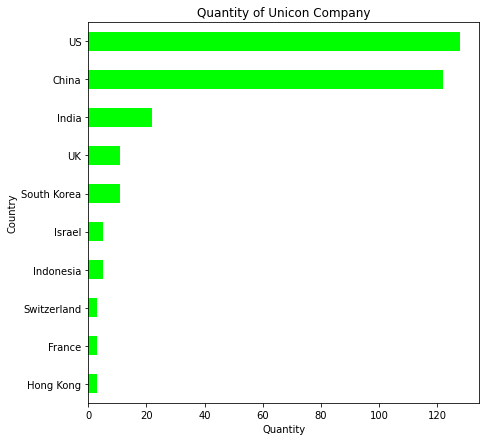

In [0]:
plt.figure(figsize=(7, 7))
DataCr.sort_values(by='Company',
                   ascending=True)['Company'].tail(10).plot(kind='barh',
                                                             color='#00ff00')

plt.title('Quantity of Unicon Company')
plt.xlabel('Quantity')
plt.ylabel('Country')
plt.show()

#แปลงตัวเลขที่มีสัญลักษณ์สกุลเงิน

In [0]:
url = 'https://github.com/prasertcbs/basic-dataset/raw/master/FIFA2018/PlayerPersonalData.csv'
pd.set_option('display.max_columns', 0,
              'display.max_colwidth', 0)
Data = pd.read_csv(url)
Data.head()

,Unnamed: 0,Unnamed: 0.1,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special
0,0,0,20801,Cristiano Ronaldo,32,https://cdn.sofifa.org/players/10/16/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Real Madrid CF,https://cdn.sofifa.org/24/18/teams/243.png,€95.5M,€565K,2228
1,1,1,158023,L. Messi,30,https://cdn.sofifa.org/players/10/16/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,93,93,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,€105M,€565K,2154
2,2,2,190871,Neymar,25,https://cdn.sofifa.org/players/10/16/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,94,Paris Saint-Germain,https://cdn.sofifa.org/24/18/teams/73.png,€123M,€280K,2100
3,3,3,176580,L. Suárez,30,https://cdn.sofifa.org/players/10/16/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,92,92,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,€97M,€510K,2291
4,4,4,167495,M. Neuer,31,https://cdn.sofifa.org/players/10/16/167495.png,Germany,https://cdn.sofifa.org/flags/21.png,92,92,FC Bayern Munich,https://cdn.sofifa.org/24/18/teams/21.png,€61M,€230K,1493


In [0]:
Data.drop(columns=['Unnamed: 0', 'Unnamed: 0.1', 'Photo', 'Flag', 'Club Logo'],
          inplace=True)
Data.tail()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special
17976,237463,A. Kelsey,17,England,46,63,Scunthorpe United,€50K,€1K,755
17977,11728,B. Richardson,47,England,46,46,Wycombe Wanderers,€0,€1K,832
17978,231381,J. Young,17,Scotland,46,61,Swindon Town,€60K,€1K,1194
17979,238813,J. Lundstram,18,England,46,64,Crewe Alexandra,€60K,€1K,1302
17980,238308,L. Sackey,18,Ghana,46,64,Scunthorpe United,€50K,€1K,1031


In [0]:
#เปลี่ยนชื่อ Columns
Data.rename(columns={'Value': 'Value_EUR',
                     'Wage': 'Wage_EUR'},
            inplace=True)
Data

,ID,Name,Age,Nationality,Overall,Potential,Club,Value_EUR,Wage_EUR,Special
0,20801,Cristiano Ronaldo,32,Portugal,94,94,Real Madrid CF,€95.5M,€565K,2228
1,158023,L. Messi,30,Argentina,93,93,FC Barcelona,€105M,€565K,2154
2,190871,Neymar,25,Brazil,92,94,Paris Saint-Germain,€123M,€280K,2100
3,176580,L. Suárez,30,Uruguay,92,92,FC Barcelona,€97M,€510K,2291
4,167495,M. Neuer,31,Germany,92,92,FC Bayern Munich,€61M,€230K,1493
...,...,...,...,...,...,...,...,...,...,...
17976,237463,A. Kelsey,17,England,46,63,Scunthorpe United,€50K,€1K,755
17977,11728,B. Richardson,47,England,46,46,Wycombe Wanderers,€0,€1K,832
17978,231381,J. Young,17,Scotland,46,61,Swindon Town,€60K,€1K,1194
17979,238813,J. Lundstram,18,England,46,64,Crewe Alexandra,€60K,€1K,1302


In [0]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17981 entries, 0 to 17980
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           17981 non-null  int64 
 1   Name         17981 non-null  object
 2   Age          17981 non-null  int64 
 3   Nationality  17981 non-null  object
 4   Overall      17981 non-null  int64 
 5   Potential    17981 non-null  int64 
 6   Club         17733 non-null  object
 7   Value_EUR    17981 non-null  object
 8   Wage_EUR     17981 non-null  object
 9   Special      17981 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 1.4+ MB


In [0]:
#ดูตัวสุดท้าย ว่าเป็นยังไงบ้าง
Data['Value_EUR'].str[-1:].unique()

array(['M', '0', 'K'], dtype=object)

In [0]:
#Strip = ลบ Space หน้า หลัง #upper()ทำให้เป็นตัวใหญ่
#1e6 คือ 1 กับ 0อีก 6 ตัว = 1000000
#สร้าง Function มาหาตัว Multiplier ว่าจะคูณเท่าไหร่
def value_unit(s: str):
  s = s.strip().upper()
  if s[-1] == 'M':
    return 1e6
  elif s[-1] == 'K':
    return 1e3
  else:
    return 1

In [0]:
value_unit('9k')

1000.0

In [0]:
#r มาจาก replace (r'[^0-9]' ในที่นี้คือ replace ทุกตัวที่ไม่ใช่ 0-9 พูดง่ายๆว่าเหลือ 0-9 ไว้
#สร้าง Function หาว่าคูณแล้วได้เท่าไหร่
import re #Regular Expression
def str_value(s: str):
  mul = value_unit(s)
  return float(re.sub(r'[^0-9.]', '', s)) * mul #s คือค่าที่ต้องการ replace

In [0]:
str_value('9.5m')

9500000.0

In [0]:
Data[['Value_EUR', 'Wage_EUR']].applymap(lambda s: str_value(s)).head(10)

,Value_EUR,Wage_EUR
0,95500000.0,565000.0
1,105000000.0,565000.0
2,123000000.0,280000.0
3,97000000.0,510000.0
4,61000000.0,230000.0
5,92000000.0,355000.0
6,64500000.0,215000.0
7,90500000.0,295000.0
8,79000000.0,340000.0
9,77000000.0,275000.0


In [0]:
Data[['Value_EUR', 'Wage_EUR']] = Data[['Value_EUR', 'Wage_EUR']].applymap(lambda s: str_value(s))
Data

,ID,Name,Age,Nationality,Overall,Potential,Club,Value_EUR,Wage_EUR,Special
0,20801,Cristiano Ronaldo,32,Portugal,94,94,Real Madrid CF,95500000.0,565000.0,2228
1,158023,L. Messi,30,Argentina,93,93,FC Barcelona,105000000.0,565000.0,2154
2,190871,Neymar,25,Brazil,92,94,Paris Saint-Germain,123000000.0,280000.0,2100
3,176580,L. Suárez,30,Uruguay,92,92,FC Barcelona,97000000.0,510000.0,2291
4,167495,M. Neuer,31,Germany,92,92,FC Bayern Munich,61000000.0,230000.0,1493
...,...,...,...,...,...,...,...,...,...,...
17976,237463,A. Kelsey,17,England,46,63,Scunthorpe United,50000.0,1000.0,755
17977,11728,B. Richardson,47,England,46,46,Wycombe Wanderers,0.0,1000.0,832
17978,231381,J. Young,17,Scotland,46,61,Swindon Town,60000.0,1000.0,1194
17979,238813,J. Lundstram,18,England,46,64,Crewe Alexandra,60000.0,1000.0,1302


In [0]:
Data.describe()

,ID,Age,Overall,Potential,Value_EUR,Wage_EUR,Special
count,17981.000000,17981.000000,17981.000000,17981.000000,1.798100e+04,17981.000000,17981.000000
mean,207658.710138,25.144541,66.247984,71.190813,2.385390e+06,11546.966242,1594.095100
std,32291.667313,4.614272,6.987965,6.102199,5.353970e+06,23080.000139,272.151435
min,16.000000,16.000000,46.000000,46.000000,0.000000e+00,0.000000,728.000000
25%,192622.000000,21.000000,62.000000,67.000000,3.000000e+05,2000.000000,1449.000000
50%,214057.000000,25.000000,66.000000,71.000000,6.750000e+05,4000.000000,1633.000000
75%,231448.000000,28.000000,71.000000,75.000000,2.100000e+06,12000.000000,1786.000000
max,241219.000000,47.000000,94.000000,94.000000,1.230000e+08,565000.000000,2291.000000


In [0]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17981 entries, 0 to 17980
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           17981 non-null  int64  
 1   Name         17981 non-null  object 
 2   Age          17981 non-null  int64  
 3   Nationality  17981 non-null  object 
 4   Overall      17981 non-null  int64  
 5   Potential    17981 non-null  int64  
 6   Club         17733 non-null  object 
 7   Value_EUR    17981 non-null  float64
 8   Wage_EUR     17981 non-null  float64
 9   Special      17981 non-null  int64  
dtypes: float64(2), int64(5), object(3)
memory usage: 1.4+ MB


In [0]:
Data.nlargest(10, 'Value_EUR')[['Name', 'Value_EUR']]

,Name,Value_EUR
2,Neymar,123000000.0
1,L. Messi,105000000.0
3,L. Suárez,97000000.0
0,Cristiano Ronaldo,95500000.0
5,R. Lewandowski,92000000.0
7,E. Hazard,90500000.0
11,K. De Bruyne,83000000.0
8,T. Kroos,79000000.0
19,P. Dybala,79000000.0
9,G. Higuaín,77000000.0


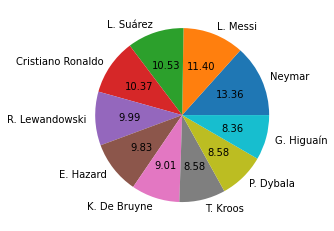

In [0]:
plt.pie(Data.nlargest(10, 'Value_EUR')['Value_EUR'],
        autopct='%1.2F',
        labels=Data.nlargest(10, 'Value_EUR')['Name'])

plt.show()

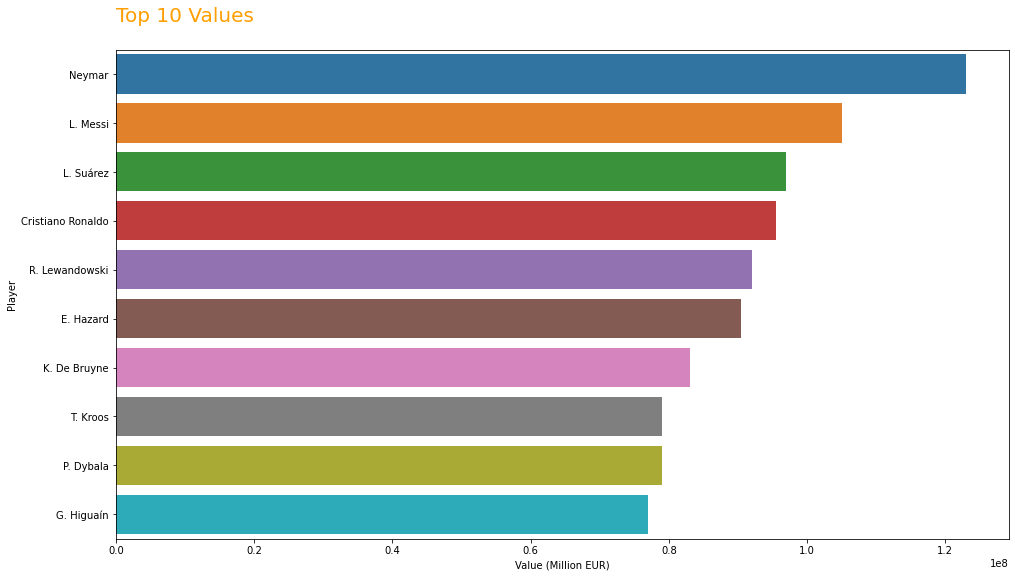

In [0]:
plt.figure(figsize=(16, 9))
sns.barplot(x=Data.nlargest(10, 'Value_EUR')['Value_EUR'],
            y=Data.nlargest(10, 'Value_EUR')['Name'])

plt.title('Top 10 Values\n',
          fontsize=20,
          color='#ff9e00',
          loc='left')
plt.ylabel('Player',
           fontsize=10)
plt.xlabel('Value (Million EUR)')
plt.show()

#Lambda

In [0]:
def cel2fah(c):
  return (c * (9 / 5)) + 32

In [0]:
cel2fah(5)

41.0

In [0]:
lambda c: (c * (9/5)) +32

<function __main__.<lambda>>

In [0]:
#ตั้งชื่อให้ lambda ได้
c2f = lambda c: (c * (9/5)) +32

In [0]:
c2f(35)

95.0

In [0]:
#ปกติ lambda จะใช้กับพวกที่เป็น list
t = np.random.randint(low=10,
                      high=40,
                      size=5)
print(t)
print(c2f(t))

[39 37 21 24 23]
[102.2  98.6  69.8  75.2  73.4]


In [0]:
list(map(lambda c: c2f(c).round(2), t))

[102.2, 98.6, 69.8, 75.2, 73.4]

In [0]:
list(map(lambda c: round(c * (9/5) +32, 2), t))

[102.2, 98.6, 69.8, 75.2, 73.4]

In [0]:
#Paremeter มากกว่า 1 ตัว
rectangle = lambda w, h: w * h
rectangle(5, 10)

50

In [0]:
Data = pd.DataFrame({'Celcius': t})
Data

,Celcius
0,39
1,37
2,21
3,24
4,23


In [0]:
Data['Fahrenhiet'] = Data['Celcius'] * 9/5 + 32
Data

,Celcius,Fahrenhiet
0,39,102.2
1,37,98.6
2,21,69.8
3,24,75.2
4,23,73.4


In [0]:
#ผลลัพท์เหมือนกัน แต่ Lambda เร็วกว่า
Data['Celcius'].map(lambda c: c * 9/5 + 32)

0    102.2
1    98.6 
2    69.8 
3    75.2 
4    73.4 
Name: Celcius, dtype: float64

#Lambda กับ DataFrame

In [0]:
url = 'https://github.com/prasertcbs/tutorial/raw/master/applicant.tsv'
Data = pd.read_table(url)
Data

,applicantID,eng,math,interview
0,A432,91,97,83
1,C747,94,94,58
2,C751,74,55,89
3,B716,63,89,93
4,A623,90,73,81
5,B394,76,91,90
6,A294,90,86,94
7,B318,62,57,55
8,B164,79,57,89
9,A126,89,82,85


In [0]:
#Map ใช้กับ Series
Data['eng'].map(lambda s: 'Pass' if s >= 80 else 'Failed')

0    Pass  
1    Pass  
2    Failed
3    Failed
4    Pass  
5    Failed
6    Pass  
7    Failed
8    Failed
9    Pass  
Name: eng, dtype: object

In [0]:
#Apply ใช้กับ DataFrame จะใส่หลายเงื่อนไขอย่าลืมใส่ Axis ด้วย
Data.apply(lambda s: 'Pass' if s['eng'] >= 80 and s['math'] >= 75 else 'Failed',
           axis=1)

0    Pass  
1    Pass  
2    Failed
3    Failed
4    Failed
5    Failed
6    Pass  
7    Failed
8    Failed
9    Pass  
dtype: object

In [0]:
Data['Pass or Failed'] = Data.apply(lambda s: 'Pass' if s.eng >= 80 and s.math >= 75 else 'Failed',
                                    axis=1)
Data[['applicantID', 'Pass or Failed']]

,applicantID,Pass or Failed
0,A432,Pass
1,C747,Pass
2,C751,Failed
3,B716,Failed
4,A623,Failed
5,B394,Failed
6,A294,Pass
7,B318,Failed
8,B164,Failed
9,A126,Pass


In [0]:
Data.apply(lambda s: s['eng'] * 0.5 + s['math'] * 0.3 + s['interview'] * 0.2,
           axis=1)

0    91.2
1    86.8
2    71.3
3    76.8
4    83.1
5    83.3
6    89.6
7    59.1
8    74.4
9    86.1
dtype: float64

In [0]:
Data['Total Score'] = Data.apply(lambda s: s['eng'] * 0.5 + s['math'] * 0.3 + s['interview'] *0.2,
                                 axis=1)
Data

,applicantID,eng,math,interview,Pass or Failed,Total Score
0,A432,91,97,83,Pass,91.2
1,C747,94,94,58,Pass,86.8
2,C751,74,55,89,Failed,71.3
3,B716,63,89,93,Failed,76.8
4,A623,90,73,81,Failed,83.1
5,B394,76,91,90,Failed,83.3
6,A294,90,86,94,Pass,89.6
7,B318,62,57,55,Failed,59.1
8,B164,79,57,89,Failed,74.4
9,A126,89,82,85,Pass,86.1


In [0]:
#Applt ได้ทั้ง Series และ DataFrame
Data['Qualify'] = Data['Total Score'].apply(lambda s: 'Qualify' if s >= 80 else 'Not Qualify')
Data

,applicantID,eng,math,interview,Pass or Failed,Total Score,Qualify,Qualify2
0,A432,91,97,83,Pass,91.2,Qualify,Yes
1,C747,94,94,58,Pass,86.8,Qualify,Yes
2,C751,74,55,89,Failed,71.3,Not Qualify,No
3,B716,63,89,93,Failed,76.8,Not Qualify,No
4,A623,90,73,81,Failed,83.1,Qualify,Yes
5,B394,76,91,90,Failed,83.3,Qualify,Yes
6,A294,90,86,94,Pass,89.6,Qualify,Yes
7,B318,62,57,55,Failed,59.1,Not Qualify,No
8,B164,79,57,89,Failed,74.4,Not Qualify,No
9,A126,89,82,85,Pass,86.1,Qualify,Yes


In [0]:
#Map ได้เฉพาะ Series
Data['Qualify2'] = Data['Total Score'].map(lambda s: 'Yes' if s >= 80 else 'No')
Data

,applicantID,eng,math,interview,Pass or Failed,Total Score,Qualify,Qualify2
0,A432,91,97,83,Pass,91.2,Qualify,Yes
1,C747,94,94,58,Pass,86.8,Qualify,Yes
2,C751,74,55,89,Failed,71.3,Not Qualify,No
3,B716,63,89,93,Failed,76.8,Not Qualify,No
4,A623,90,73,81,Failed,83.1,Qualify,Yes
5,B394,76,91,90,Failed,83.3,Qualify,Yes
6,A294,90,86,94,Pass,89.6,Qualify,Yes
7,B318,62,57,55,Failed,59.1,Not Qualify,No
8,B164,79,57,89,Failed,74.4,Not Qualify,No
9,A126,89,82,85,Pass,86.1,Qualify,Yes


#Map

In [0]:
url = 'https://github.com/prasertcbs/tutorial/raw/master/mpg.csv'
Dat = pd.read_csv(url)
Dat.sample(10)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
153,nissan,pathfinder 4wd,5.6,2008,8,auto(s5),4,12,18,p,suv
7,audi,a4 quattro,1.8,1999,4,manual(m5),4,18,26,p,compact
191,toyota,camry solara,3.0,1999,6,manual(m5),f,18,26,r,compact
20,chevrolet,c1500 suburban 2wd,5.3,2008,8,auto(l4),r,14,20,r,suv
181,toyota,camry,2.4,2008,4,manual(m5),f,21,31,r,midsize
15,audi,a6 quattro,2.8,1999,6,auto(l5),4,15,24,p,midsize
162,subaru,forester awd,2.5,2008,4,manual(m5),4,19,25,p,suv
174,toyota,4runner 4wd,2.7,1999,4,auto(l4),4,16,20,r,suv
207,volkswagen,gti,2.0,1999,4,manual(m5),f,21,29,r,compact
125,jeep,grand cherokee 4wd,4.7,1999,8,auto(l4),4,14,17,r,suv


In [0]:
#ทำแบบนี้จะสร้าง Column ที่ชื่อว่า Index เพิ่มขึ้นมา
Data = Dat.sample(10).reset_index()
Data

,index,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,217,volkswagen,jetta,2.5,2008,5,auto(s6),f,21,29,r,compact
1,137,mercury,mountaineer 4wd,4.0,1999,6,auto(l5),4,14,17,r,suv
2,177,toyota,4runner 4wd,4.0,2008,6,auto(l5),4,16,20,r,suv
3,121,hyundai,tiburon,2.7,2008,6,manual(m5),f,17,24,r,subcompact
4,180,toyota,camry,2.2,1999,4,auto(l4),f,21,27,r,midsize
5,220,volkswagen,jetta,2.8,1999,6,manual(m5),f,17,24,r,compact
6,108,hyundai,sonata,2.4,1999,4,auto(l4),f,18,26,r,midsize
7,159,subaru,forester awd,2.5,1999,4,manual(m5),4,18,25,r,suv
8,47,dodge,caravan 2wd,4.0,2008,6,auto(l6),f,16,23,r,minivan
9,213,volkswagen,jetta,2.0,1999,4,manual(m5),f,21,29,r,compact


In [0]:
#ถ้าไม่อยากให้มีคำว่า Index ก็ใส่ drop=True เข้าไป
Data = Dat.sample(10).reset_index(drop=True)
Data

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,chevrolet,malibu,3.1,1999,6,auto(l4),f,18,26,r,midsize
1,nissan,altima,3.5,2008,6,manual(m6),f,19,27,p,midsize
2,nissan,pathfinder 4wd,3.3,1999,6,manual(m5),4,15,17,r,suv
3,land rover,range rover,4.4,2008,8,auto(s6),4,12,18,r,suv
4,subaru,impreza awd,2.5,2008,4,auto(s4),4,20,25,p,compact
5,audi,a4,3.1,2008,6,auto(av),f,18,27,p,compact
6,toyota,toyota tacoma 4wd,4.0,2008,6,manual(m6),4,15,18,r,pickup
7,hyundai,tiburon,2.0,2008,4,auto(l4),f,20,27,r,subcompact
8,audi,a4 quattro,3.1,2008,6,manual(m6),4,15,25,p,compact
9,toyota,4runner 4wd,2.7,1999,4,auto(l4),4,16,20,r,suv


In [0]:
Data['manufacturer'] = Data['manufacturer'].str.capitalize()
Data

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,Chevrolet,malibu,3.1,1999,6,auto(l4),f,18,26,r,midsize
1,Nissan,altima,3.5,2008,6,manual(m6),f,19,27,p,midsize
2,Nissan,pathfinder 4wd,3.3,1999,6,manual(m5),4,15,17,r,suv
3,Land rover,range rover,4.4,2008,8,auto(s6),4,12,18,r,suv
4,Subaru,impreza awd,2.5,2008,4,auto(s4),4,20,25,p,compact
5,Audi,a4,3.1,2008,6,auto(av),f,18,27,p,compact
6,Toyota,toyota tacoma 4wd,4.0,2008,6,manual(m6),4,15,18,r,pickup
7,Hyundai,tiburon,2.0,2008,4,auto(l4),f,20,27,r,subcompact
8,Audi,a4 quattro,3.1,2008,6,manual(m6),4,15,25,p,compact
9,Toyota,4runner 4wd,2.7,1999,4,auto(l4),4,16,20,r,suv


In [0]:
Data.columns = Data.columns.str.capitalize()
Data

,Manufacturer,Model,Displ,Year,Cyl,Trans,Drv,Cty,Hwy,Fl,Class
0,Chevrolet,malibu,3.1,1999,6,auto(l4),f,18,26,r,midsize
1,Nissan,altima,3.5,2008,6,manual(m6),f,19,27,p,midsize
2,Nissan,pathfinder 4wd,3.3,1999,6,manual(m5),4,15,17,r,suv
3,Land rover,range rover,4.4,2008,8,auto(s6),4,12,18,r,suv
4,Subaru,impreza awd,2.5,2008,4,auto(s4),4,20,25,p,compact
5,Audi,a4,3.1,2008,6,auto(av),f,18,27,p,compact
6,Toyota,toyota tacoma 4wd,4.0,2008,6,manual(m6),4,15,18,r,pickup
7,Hyundai,tiburon,2.0,2008,4,auto(l4),f,20,27,r,subcompact
8,Audi,a4 quattro,3.1,2008,6,manual(m6),4,15,25,p,compact
9,Toyota,4runner 4wd,2.7,1999,4,auto(l4),4,16,20,r,suv


In [0]:
Data['Trans2'] = Data['Trans'].map(lambda v: 'Auto' if v[0] == 'a' else 'Manual').astype('category')
Data[['Trans', 'Trans2']]

,Trans,Trans2
0,auto(l4),Auto
1,manual(m6),Manual
2,manual(m5),Manual
3,auto(s6),Auto
4,auto(s4),Auto
5,auto(av),Auto
6,manual(m6),Manual
7,auto(l4),Auto
8,manual(m6),Manual
9,auto(l4),Auto


In [0]:
print(f'Trans type is {type(Data.Trans[0])}')
print(f'Trans2 type is {type(Data.Trans2[0])}')

Trans type is <class 'str'>
Trans2 type is <class 'str'>


In [0]:
def am(v):
  if v[0] == 'a':
    return 'Auto'
  else:
    return 'Manual'

In [0]:
Data['Trans'].map(am)

0    Auto  
1    Manual
2    Manual
3    Auto  
4    Auto  
5    Auto  
6    Manual
7    Auto  
8    Manual
9    Auto  
Name: Trans, dtype: object

In [0]:
Data['Drv2'] = Data['Drv'].map({'4': '4 Wheel',
                 'f': 'Front',
                 'r': 'Rear'}).astype('category')

pandas.core.series.Series

In [0]:
#การใช้ elif ใน Lambda
Data['Drv'].map(lambda v: '4 Wheel' if v == '4' else ('Front' if v == 'f' else 'Rear'))

0    Front  
1    Front  
2    4 Wheel
3    4 Wheel
4    4 Wheel
5    Front  
6    4 Wheel
7    Front  
8    4 Wheel
9    4 Wheel
Name: Drv, dtype: object

In [0]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Manufacturer  10 non-null     object  
 1   Model         10 non-null     object  
 2   Displ         10 non-null     float64 
 3   Year          10 non-null     int64   
 4   Cyl           10 non-null     int64   
 5   Trans         10 non-null     object  
 6   Drv           10 non-null     object  
 7   Cty           10 non-null     int64   
 8   Hwy           10 non-null     int64   
 9   Fl            10 non-null     object  
 10  Class         10 non-null     object  
 11  Trans2        10 non-null     category
 12  Drv2          10 non-null     category
dtypes: category(2), float64(1), int64(4), object(6)
memory usage: 1.2+ KB


In [0]:
Data

,Manufacturer,Model,Displ,Year,Cyl,Trans,Drv,Cty,Hwy,Fl,Class,Trans2,Drv2
0,Chevrolet,malibu,3.1,1999,6,auto(l4),f,18,26,r,midsize,Auto,Front
1,Nissan,altima,3.5,2008,6,manual(m6),f,19,27,p,midsize,Manual,Front
2,Nissan,pathfinder 4wd,3.3,1999,6,manual(m5),4,15,17,r,suv,Manual,4 Wheel
3,Land rover,range rover,4.4,2008,8,auto(s6),4,12,18,r,suv,Auto,4 Wheel
4,Subaru,impreza awd,2.5,2008,4,auto(s4),4,20,25,p,compact,Auto,4 Wheel
5,Audi,a4,3.1,2008,6,auto(av),f,18,27,p,compact,Auto,Front
6,Toyota,toyota tacoma 4wd,4.0,2008,6,manual(m6),4,15,18,r,pickup,Manual,4 Wheel
7,Hyundai,tiburon,2.0,2008,4,auto(l4),f,20,27,r,subcompact,Auto,Front
8,Audi,a4 quattro,3.1,2008,6,manual(m6),4,15,25,p,compact,Manual,4 Wheel
9,Toyota,4runner 4wd,2.7,1999,4,auto(l4),4,16,20,r,suv,Auto,4 Wheel


#Applymap

In [0]:
url = 'https://github.com/prasertcbs/tutorial/raw/master/currency.tsv'
Data = pd.read_table(url,
                     index_col='Year')
Data

,TV,Camera,Phone
Year,,,
2011,"THB556,300","THB943,620","THB518,600"
2012,"THB344,200","THB583,370","THB323,920"
2013,"THB727,320","THB548,640","THB941,500"
2014,"THB462,870","THB661,520","THB650,570"
2015,"THB916,600","THB974,180","THB148,740"
2016,"THB176,830","THB588,990","THB910,570"
2017,"THB745,550","THB896,860","THB982,820"


In [0]:
Data.rename(columns={'TV': 'TV Price (THB)',
                     'Camera': 'Camera Price (THB)',
                     'Phone': 'Phone Price (THB)'},
            inplace=True)
Data

,TV Price (THB),Camera Price (THB),Phone Price (THB)
Year,,,
2011,"THB556,300","THB943,620","THB518,600"
2012,"THB344,200","THB583,370","THB323,920"
2013,"THB727,320","THB548,640","THB941,500"
2014,"THB462,870","THB661,520","THB650,570"
2015,"THB916,600","THB974,180","THB148,740"
2016,"THB176,830","THB588,990","THB910,570"
2017,"THB745,550","THB896,860","THB982,820"


In [0]:
#.str.replace ใช้ได้เฉพาะกับ Series ใช้กับ DataFrame ไม่ได้
#เลยต้อง ทำทีละ Columns
Data['TV Price (THB)'].str.replace('\D', '').astype('int')

Year
2011    556300
2012    344200
2013    727320
2014    462870
2015    916600
2016    176830
2017    745550
Name: TV Price (THB), dtype: int64

In [0]:
#ApplyMap ทำงานกับสมาชิกทุกตัวใน DataFrame
import re
def remove_nondigit(v):
  return int(re.sub(r'\D', '', v))

In [0]:
remove_nondigit('djghxfughd4521584')

4521584

In [0]:
Data.applymap(remove_nondigit)

,TV Price (THB),Camera Price (THB),Phone Price (THB)
Year,,,
2011,556300,943620,518600
2012,344200,583370,323920
2013,727320,548640,941500
2014,462870,661520,650570
2015,916600,974180,148740
2016,176830,588990,910570
2017,745550,896860,982820


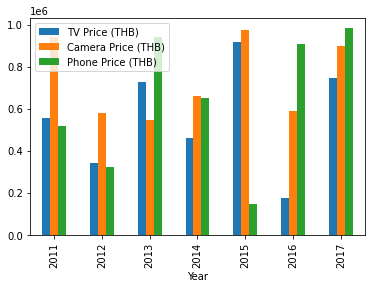

In [0]:
Data.applymap(remove_nondigit).plot(kind='bar')
plt.show()

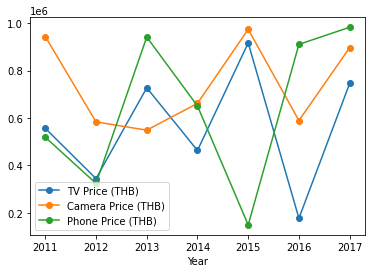

In [0]:
Data.applymap(remove_nondigit).plot(kind='line',
                                    marker='o')
plt.show()

In [0]:
#Lambda
Data.applymap(lambda v: int(re.sub(r'\D', '', v)))

,TV Price (THB),Camera Price (THB),Phone Price (THB)
Year,,,
2011,556300,943620,518600
2012,344200,583370,323920
2013,727320,548640,941500
2014,462870,661520,650570
2015,916600,974180,148740
2016,176830,588990,910570
2017,745550,896860,982820


#Applymap (MPG)

In [0]:
url = 'https://github.com/prasertcbs/tutorial/raw/master/mpg.csv'
Data = pd.read_csv(url)
Data

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
229,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
230,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
231,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
232,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


In [0]:
#แปลงตัวอักษาตัวแรกเป็นตัวใหญ่
Data[['manufacturer', 'model', 'class']] = Data[['manufacturer', 'model', 'class']].applymap(lambda v: v.capitalize()).astype('category')

In [0]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   manufacturer  234 non-null    category
 1   model         234 non-null    category
 2   displ         234 non-null    float64 
 3   year          234 non-null    int64   
 4   cyl           234 non-null    int64   
 5   trans         234 non-null    object  
 6   drv           234 non-null    object  
 7   cty           234 non-null    int64   
 8   hwy           234 non-null    int64   
 9   fl            234 non-null    object  
 10  class         234 non-null    category
dtypes: category(3), float64(1), int64(4), object(3)
memory usage: 18.1+ KB


In [0]:
#แบบนี้ใส่ Astype ไม่ได้
Data[['manufacturer', 'model', 'class']] = Data[['manufacturer', 'model', 'class']].applymap(str.capitalize)

#Apply

In [0]:
url = 'https://github.com/prasertcbs/tutorial/raw/master/sales.tsv'
Data = pd.read_table(url,
                     index_col='Year')
Data

,TV,Camera,Phone
Year,,,
2011,556300,943620,518600
2012,344200,583370,323920
2013,727320,548640,941500
2014,462870,661520,650570
2015,916600,974180,148740
2016,176830,588990,910570
2017,745550,896860,982820


In [0]:
Data.sum()

TV        3929670
Camera    5197180
Phone     4476720
dtype: int64

In [0]:
Data.sum(axis=1)

Year
2011    2018520
2012    1251490
2013    2217460
2014    1774960
2015    2039520
2016    1676390
2017    2625230
dtype: int64

In [0]:
from scipy import stats

In [0]:
#Harmonic Mean ไม่ม่ใน Pandas เลยต้องใช้ Apply ช่วย
Data.apply(stats.hmean,
           axis=1)

Year
2011    626879.558570
2012    389274.318996
2013    704269.269335
2014    575902.233035
2015    339342.184959
2016    354979.850179
2017    863614.238880
dtype: float64

In [0]:
Data.mean(axis=1)

Year
2011    672840.000000
2012    417163.333333
2013    739153.333333
2014    591653.333333
2015    679840.000000
2016    558796.666667
2017    875076.666667
dtype: float64

#Apply (MPG)

In [0]:
url = 'https://github.com/prasertcbs/tutorial/raw/master/mpg.csv'
Data = pd.read_csv(url)
Data

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
229,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
230,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
231,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
232,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


In [0]:
Data['manufacturer'].map(str.upper).sample(5)

26     CHEVROLET
149    NISSAN   
152    NISSAN   
88     FORD     
206    TOYOTA   
Name: manufacturer, dtype: object

In [0]:
Data[['manufacturer', 'model', 'class']].applymap(str.capitalize).sample(5)

,manufacturer,model,class
141,Nissan,Altima,Compact
169,Subaru,Impreza awd,Compact
186,Toyota,Camry solara,Compact
190,Toyota,Camry solara,Compact
213,Volkswagen,Jetta,Compact


In [0]:
Data[['manufacturer', 'model', 'class']].apply(lambda s: s.str.capitalize()).sample(5)

,manufacturer,model,class
133,Land rover,Range rover,Suv
164,Subaru,Forester awd,Suv
107,Honda,Civic,Subcompact
186,Toyota,Camry solara,Compact
173,Toyota,4runner 4wd,Suv


In [0]:
Data

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
229,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
230,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
231,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
232,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


In [0]:
#รวม Data
Data.apply(lambda d: f'{d.manufacturer} ({d.model}) ({d.trans})',
           axis=1) #ทำเรียงไปทีละ Columns

0      audi (a4) (auto(l5))            
1      audi (a4) (manual(m5))          
2      audi (a4) (manual(m6))          
3      audi (a4) (auto(av))            
4      audi (a4) (auto(l5))            
               ...                     
229    volkswagen (passat) (auto(s6))  
230    volkswagen (passat) (manual(m6))
231    volkswagen (passat) (auto(l5))  
232    volkswagen (passat) (manual(m5))
233    volkswagen (passat) (auto(s6))  
Length: 234, dtype: object

In [0]:
#แปลงข้อมูล MPG เป็น KML
#:4.1f ตือใช้ทศนิยมกี่ตำแหน่ง และมีตัวอีกษรข้างหน้ากี่ตัว ใช้เพื่อให้ตัวอักษรอยู่ตำแหน่งเดียวกัน
Data.apply(lambda d: f'{d.cty * 0.425:.1f} / {d.hwy * 0.425:4.1f}',
           axis=1).head(30)

0     7.6 / 12.3
1     8.9 / 12.3
2     8.5 / 13.2
3     8.9 / 12.8
4     6.8 / 11.0
5     7.6 / 11.0
6     7.6 / 11.5
7     7.6 / 11.0
8     6.8 / 10.6
9     8.5 / 11.9
10    8.1 / 11.5
11    6.4 / 10.6
12    7.2 / 10.6
13    7.2 / 10.6
14    6.4 / 10.6
15    6.4 / 10.2
16    7.2 / 10.6
17    6.8 /  9.8
18    6.0 /  8.5
19    4.7 /  6.4
20    6.0 /  8.5
21    5.5 /  7.2
22    5.1 /  7.2
23    6.8 / 11.0
24    6.4 /  9.8
25    6.8 / 11.0
26    6.4 / 10.6
27    6.4 / 10.2
28    6.0 /  8.1
29    4.7 /  6.0
dtype: object

#ตัวแปรแบบ Category
ใช้หน่วยความจำน้อยกว่า String และรันเร็วกว่า

In [2]:
url = 'https://github.com/prasertcbs/basic-dataset/raw/master/gapminder.csv'
Data = pd.read_csv(url)
Data[:10]

,country,year,continent,lifeExp,pop,gdpPercap
0,Afghanistan,1952,Asia,28.801,8425333,779.445314
1,Afghanistan,1957,Asia,30.332,9240934,820.853030
2,Afghanistan,1962,Asia,31.997,10267083,853.100710
3,Afghanistan,1967,Asia,34.020,11537966,836.197138
4,Afghanistan,1972,Asia,36.088,13079460,739.981106
5,Afghanistan,1977,Asia,38.438,14880372,786.113360
6,Afghanistan,1982,Asia,39.854,12881816,978.011439
7,Afghanistan,1987,Asia,40.822,13867957,852.395945
8,Afghanistan,1992,Asia,41.674,16317921,649.341395
9,Afghanistan,1997,Asia,41.763,22227415,635.341351


In [3]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    1704 non-null   object 
 1   year       1704 non-null   int64  
 2   continent  1704 non-null   object 
 3   lifeExp    1704 non-null   float64
 4   pop        1704 non-null   int64  
 5   gdpPercap  1704 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 80.0+ KB


In [4]:
#แปลง Country เป็น Type Category
Data['Country_Category'] = Data.country.astype('category')
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   country           1704 non-null   object  
 1   year              1704 non-null   int64   
 2   continent         1704 non-null   object  
 3   lifeExp           1704 non-null   float64 
 4   pop               1704 non-null   int64   
 5   gdpPercap         1704 non-null   float64 
 6   Country_Category  1704 non-null   category
dtypes: category(1), float64(2), int64(2), object(2)
memory usage: 89.4+ KB


In [5]:
#แปลง String เป็น category จะทำให้ใช้หน่วยความจำน้อยลง
Data.memory_usage(deep=True)

Index                  128
country             111360
year                 13632
continent           107184
lifeExp              13632
pop                  13632
gdpPercap            13632
Country_Category     17808
dtype: int64

In [6]:
Data['continent_cat'] = Data['continent'].astype('category')
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   country           1704 non-null   object  
 1   year              1704 non-null   int64   
 2   continent         1704 non-null   object  
 3   lifeExp           1704 non-null   float64 
 4   pop               1704 non-null   int64   
 5   gdpPercap         1704 non-null   float64 
 6   Country_Category  1704 non-null   category
 7   continent_cat     1704 non-null   category
dtypes: category(2), float64(2), int64(2), object(2)
memory usage: 91.3+ KB


In [7]:
Data.memory_usage(deep=True)

Index                  128
country             111360
year                 13632
continent           107184
lifeExp              13632
pop                  13632
gdpPercap            13632
Country_Category     17808
continent_cat         2180
dtype: int64

In [8]:
#ถ้าเรารู้ว่าอันนไหนจะเป็น Category ก็แปลงตั้งแต่ตอนอ่าน File เลย
url = 'https://github.com/prasertcbs/basic-dataset/raw/master/gapminder.csv'
Data = pd.read_csv(url,
                   dtype={'country': 'category',
                          'continent': 'category'})
Data[:10]

,country,year,continent,lifeExp,pop,gdpPercap
0,Afghanistan,1952,Asia,28.801,8425333,779.445314
1,Afghanistan,1957,Asia,30.332,9240934,820.853030
2,Afghanistan,1962,Asia,31.997,10267083,853.100710
3,Afghanistan,1967,Asia,34.020,11537966,836.197138
4,Afghanistan,1972,Asia,36.088,13079460,739.981106
5,Afghanistan,1977,Asia,38.438,14880372,786.113360
6,Afghanistan,1982,Asia,39.854,12881816,978.011439
7,Afghanistan,1987,Asia,40.822,13867957,852.395945
8,Afghanistan,1992,Asia,41.674,16317921,649.341395
9,Afghanistan,1997,Asia,41.763,22227415,635.341351


In [9]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   country    1704 non-null   category
 1   year       1704 non-null   int64   
 2   continent  1704 non-null   category
 3   lifeExp    1704 non-null   float64 
 4   pop        1704 non-null   int64   
 5   gdpPercap  1704 non-null   float64 
dtypes: category(2), float64(2), int64(2)
memory usage: 59.7 KB


In [10]:
Data.memory_usage(deep=True)

Index          128
country      12688
year         13632
continent     2180
lifeExp      13632
pop          13632
gdpPercap    13632
dtype: int64

In [14]:
Data['Continent Code'] = Data['continent'].cat.codes
Data[['continent', 'Continent Code']]

,continent,Continent Code
0,Asia,2
1,Asia,2
2,Asia,2
3,Asia,2
4,Asia,2
...,...,...
1699,Africa,0
1700,Africa,0
1701,Africa,0
1702,Africa,0


#Order Category

In [71]:
url = 'https://github.com/prasertcbs/tutorial/raw/master/staff.csv'
Data = pd.read_csv(url,
                   dtype={'position': 'category',
                          'department': 'category'},
                   index_col='empID')
Data

,fname,lname,sex,dob,position,department,salary,join_date
empID,,,,,,,,
604,กันตภณ,ซ่อนกลิ่น,M,5-Mar-1994,ผู้จัดการ,HR,"13,000",28-Feb-2016
607,เกศินี,สายหยุด,F,6-Dec-1968,ผู้ช่วยผู้จัดการ,FIN,"40,000",30-Nov-1987
486,ชัชลัญญา,ลั่นทม,F,1-Jun-1987,ผู้ช่วยผู้จัดการ,FIN,"25,000",26-May-2009
229,ชาติไทย,เสี้ยวดอกแดง,M,27-Jul-1991,พนักงานระดับต้น,MKT,"39,000",21-Jul-2015
901,โชติมา,อรคนธ์,F,21-Aug-1974,รองผู้จัดการ,MKT,"82,500",18-Sep-2007
944,ฐิติรัตน์,ตันหยง,F,15-Aug-1975,พนักงานระดับต้น,HR,"38,000",9-Aug-1996
405,ณภัทร,มณฑา,M,8-Nov-1963,พนักงานระดับต้น,FIN,"35,000",2-Nov-1984
665,ณัชชา,สนสร้อย,F,17-Jun-1983,ผู้ชำนาญงาน,ACC,"21,000",11-Mar-2017
41,ณัฐญาณิน,มะลิลา,F,11-Feb-1987,ผู้จัดการ,MKT,"36,000",5-Feb-2012


In [72]:
#มันไม่เรียงตามตำแหน่ง แต่เราแก้ไขได้ด้วย Category
Data.sort_values(by='position')

,fname,lname,sex,dob,position,department,salary,join_date
empID,,,,,,,,
604,กันตภณ,ซ่อนกลิ่น,M,5-Mar-1994,ผู้จัดการ,HR,"13,000",28-Feb-2016
41,ณัฐญาณิน,มะลิลา,F,11-Feb-1987,ผู้จัดการ,MKT,"36,000",5-Feb-2012
51,ณิรดา,คัดเค้าเครือ,F,27-Apr-1972,ผู้จัดการ,MKT,"101,500",29-Oct-2001
665,ณัชชา,สนสร้อย,F,17-Jun-1983,ผู้ชำนาญงาน,ACC,"21,000",11-Mar-2017
607,เกศินี,สายหยุด,F,6-Dec-1968,ผู้ช่วยผู้จัดการ,FIN,"40,000",30-Nov-1987
486,ชัชลัญญา,ลั่นทม,F,1-Jun-1987,ผู้ช่วยผู้จัดการ,FIN,"25,000",26-May-2009
724,เดชชัย,พุทธชาติสามสี,M,13-May-1983,ผู้ช่วยผู้จัดการ,MKT,"77,500",8-Mar-2004
229,ชาติไทย,เสี้ยวดอกแดง,M,27-Jul-1991,พนักงานระดับต้น,MKT,"39,000",21-Jul-2015
944,ฐิติรัตน์,ตันหยง,F,15-Aug-1975,พนักงานระดับต้น,HR,"38,000",9-Aug-1996


In [73]:
Data['position'].unique()

[ผู้จัดการ, ผู้ช่วยผู้จัดการ, พนักงานระดับต้น, รองผู้จัดการ, ผู้ชำนาญงาน]
Categories (5, object): [ผู้จัดการ, ผู้ช่วยผู้จัดการ, พนักงานระดับต้น, รองผู้จัดการ, ผู้ชำนาญงาน]

In [74]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12 entries, 604 to 724
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   fname       12 non-null     object  
 1   lname       12 non-null     object  
 2   sex         12 non-null     object  
 3   dob         12 non-null     object  
 4   position    12 non-null     category
 5   department  12 non-null     category
 6   salary      12 non-null     object  
 7   join_date   12 non-null     object  
dtypes: category(2), object(6)
memory usage: 1.1+ KB


In [0]:
# #จัดอันดับ Category เอง
# Data['Position Cat'] = Data['position'].astype('category',
#                                                categories = ['ผู้จัดการ', 'รองผู้จัดการ', 'ผู้ช่วยผู้จัดการ', 'ผู้ชำนาญงาน', 'พนักงานระดับต้น'],
#                                                ordered=True) #ให้ categories เรียงตามลำดับที่เรากำหนดด้านบน
# Data.sort_values('Position Cat')

In [80]:
#Pandas Version ใหม่ไม่มี categories แล้วเลยต้องใช้วิธีนี้แทน
#ต้อง Import Libraries ก่อน
# from pandas.api.types import CategoricalDtype
level = ['ผู้จัดการ', 'รองผู้จัดการ', 'ผู้ช่วยผู้จัดการ', 'ผู้ชำนาญงาน', 'พนักงานระดับต้น']
Data['Position Cat'] = Data['position'].astype(CategoricalDtype(level,
                                                                ordered=True)) #ให้ categories เรียงตามลำดับที่เรากำหนดด้านบน
Data.sort_values(by='Position Cat')

,fname,lname,sex,dob,position,department,salary,join_date,Position Cat
empID,,,,,,,,,
604,กันตภณ,ซ่อนกลิ่น,M,5-Mar-1994,ผู้จัดการ,HR,"13,000",28-Feb-2016,ผู้จัดการ
41,ณัฐญาณิน,มะลิลา,F,11-Feb-1987,ผู้จัดการ,MKT,"36,000",5-Feb-2012,ผู้จัดการ
51,ณิรดา,คัดเค้าเครือ,F,27-Apr-1972,ผู้จัดการ,MKT,"101,500",29-Oct-2001,ผู้จัดการ
901,โชติมา,อรคนธ์,F,21-Aug-1974,รองผู้จัดการ,MKT,"82,500",18-Sep-2007,รองผู้จัดการ
607,เกศินี,สายหยุด,F,6-Dec-1968,ผู้ช่วยผู้จัดการ,FIN,"40,000",30-Nov-1987,ผู้ช่วยผู้จัดการ
486,ชัชลัญญา,ลั่นทม,F,1-Jun-1987,ผู้ช่วยผู้จัดการ,FIN,"25,000",26-May-2009,ผู้ช่วยผู้จัดการ
724,เดชชัย,พุทธชาติสามสี,M,13-May-1983,ผู้ช่วยผู้จัดการ,MKT,"77,500",8-Mar-2004,ผู้ช่วยผู้จัดการ
665,ณัชชา,สนสร้อย,F,17-Jun-1983,ผู้ชำนาญงาน,ACC,"21,000",11-Mar-2017,ผู้ชำนาญงาน
229,ชาติไทย,เสี้ยวดอกแดง,M,27-Jul-1991,พนักงานระดับต้น,MKT,"39,000",21-Jul-2015,พนักงานระดับต้น


#Cut, bins

In [84]:
url = 'https://github.com/prasertcbs/tutorial/raw/master/staff.csv'
Data = pd.read_csv(url,
                   index_col='empID',
                   parse_dates=['dob', 'join_date'], #แปลงค่าให้เป็น Datetime
                   thousands=',') #เอา , ในเงินเดือนออก เพราะไม่งั้นมันจะเป็น String ใช้คำนวนไม่ได้
Data

,fname,lname,sex,dob,position,department,salary,join_date
empID,,,,,,,,
604,กันตภณ,ซ่อนกลิ่น,M,1994-03-05,ผู้จัดการ,HR,13000,2016-02-28
607,เกศินี,สายหยุด,F,1968-12-06,ผู้ช่วยผู้จัดการ,FIN,40000,1987-11-30
486,ชัชลัญญา,ลั่นทม,F,1987-06-01,ผู้ช่วยผู้จัดการ,FIN,25000,2009-05-26
229,ชาติไทย,เสี้ยวดอกแดง,M,1991-07-27,พนักงานระดับต้น,MKT,39000,2015-07-21
901,โชติมา,อรคนธ์,F,1974-08-21,รองผู้จัดการ,MKT,82500,2007-09-18
944,ฐิติรัตน์,ตันหยง,F,1975-08-15,พนักงานระดับต้น,HR,38000,1996-08-09
405,ณภัทร,มณฑา,M,1963-11-08,พนักงานระดับต้น,FIN,35000,1984-11-02
665,ณัชชา,สนสร้อย,F,1983-06-17,ผู้ชำนาญงาน,ACC,21000,2017-03-11
41,ณัฐญาณิน,มะลิลา,F,1987-02-11,ผู้จัดการ,MKT,36000,2012-02-05


In [85]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12 entries, 604 to 724
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   fname       12 non-null     object        
 1   lname       12 non-null     object        
 2   sex         12 non-null     object        
 3   dob         12 non-null     datetime64[ns]
 4   position    12 non-null     object        
 5   department  12 non-null     object        
 6   salary      12 non-null     int64         
 7   join_date   12 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(5)
memory usage: 864.0+ bytes


In [88]:
salary_bucket = ['0 - 15K', '15K - 30K', '30K - 50K', '50K - 80K', '80K+']
Data['Salary Group'] = pd.cut(Data['salary'],
                              bins=[0, 15000, 30000, 50000, 80000, np.inf],
                              labels=salary_bucket,
                              right=True).astype(CategoricalDtype(salary_bucket,
                                                                  ordered=True))
#right = True คือเอาตัวด้านขวามือใน Bins มารวมด้วย ในที่นี้คือ ถ้าได้ 15000 พอดี จะเอามารวมอยู่ใน bins แต่ถ้า False จะเอาไปนับรวมใน Bins ถัดไป
Data.sort_values(by='Salary Group',
                 ascending=True)

,fname,lname,sex,dob,position,department,salary,join_date,Salary Group
empID,,,,,,,,,
604,กันตภณ,ซ่อนกลิ่น,M,1994-03-05,ผู้จัดการ,HR,13000,2016-02-28,0 - 15K
486,ชัชลัญญา,ลั่นทม,F,1987-06-01,ผู้ช่วยผู้จัดการ,FIN,25000,2009-05-26,15K - 30K
665,ณัชชา,สนสร้อย,F,1983-06-17,ผู้ชำนาญงาน,ACC,21000,2017-03-11,15K - 30K
171,ณิชา,ประดู่,F,1962-04-03,พนักงานระดับต้น,HR,25000,2017-03-28,15K - 30K
607,เกศินี,สายหยุด,F,1968-12-06,ผู้ช่วยผู้จัดการ,FIN,40000,1987-11-30,30K - 50K
229,ชาติไทย,เสี้ยวดอกแดง,M,1991-07-27,พนักงานระดับต้น,MKT,39000,2015-07-21,30K - 50K
944,ฐิติรัตน์,ตันหยง,F,1975-08-15,พนักงานระดับต้น,HR,38000,1996-08-09,30K - 50K
405,ณภัทร,มณฑา,M,1963-11-08,พนักงานระดับต้น,FIN,35000,1984-11-02,30K - 50K
41,ณัฐญาณิน,มะลิลา,F,1987-02-11,ผู้จัดการ,MKT,36000,2012-02-05,30K - 50K


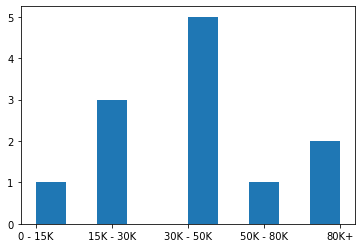

In [97]:
Data['Salary Group'].sort_values().hist(grid=False)
plt.show()

In [98]:
pd.to_datetime('today').year

2020

In [102]:
Data['Age'] = pd.to_datetime('today').year - Data['dob'].dt.year
#ใช้ .dt.year (เป็น Function ของ Pandas) ได้เลยไม่ต้อง Import datetime เพราะตอน Read Data เรา parse_dates ไว้แล้ว Data type เป็น datetime แล้ว
Data.sort_values(by='Salary Group')

,fname,lname,sex,dob,position,department,salary,join_date,Salary Group,Age
empID,,,,,,,,,,
604,กันตภณ,ซ่อนกลิ่น,M,1994-03-05,ผู้จัดการ,HR,13000,2016-02-28,0 - 15K,26
486,ชัชลัญญา,ลั่นทม,F,1987-06-01,ผู้ช่วยผู้จัดการ,FIN,25000,2009-05-26,15K - 30K,33
665,ณัชชา,สนสร้อย,F,1983-06-17,ผู้ชำนาญงาน,ACC,21000,2017-03-11,15K - 30K,37
171,ณิชา,ประดู่,F,1962-04-03,พนักงานระดับต้น,HR,25000,2017-03-28,15K - 30K,58
607,เกศินี,สายหยุด,F,1968-12-06,ผู้ช่วยผู้จัดการ,FIN,40000,1987-11-30,30K - 50K,52
229,ชาติไทย,เสี้ยวดอกแดง,M,1991-07-27,พนักงานระดับต้น,MKT,39000,2015-07-21,30K - 50K,29
944,ฐิติรัตน์,ตันหยง,F,1975-08-15,พนักงานระดับต้น,HR,38000,1996-08-09,30K - 50K,45
405,ณภัทร,มณฑา,M,1963-11-08,พนักงานระดับต้น,FIN,35000,1984-11-02,30K - 50K,57
41,ณัฐญาณิน,มะลิลา,F,1987-02-11,ผู้จัดการ,MKT,36000,2012-02-05,30K - 50K,33


In [103]:
age_labels = ['22 - 25', '25 - 30', '30 - 40', '40 - 50', '50+']
Data['Age Group'] = pd.cut(Data['Age'],
                           bins=[22, 25, 30, 40, 50, np.inf],
                           labels=age_labels,
                           right=True).astype(CategoricalDtype(age_labels,
                                                               ordered=True))
                           
Data.sort_values(by='Age Group')

,fname,lname,sex,dob,position,department,salary,join_date,Salary Group,Age,Age Group
empID,,,,,,,,,,,
604,กันตภณ,ซ่อนกลิ่น,M,1994-03-05,ผู้จัดการ,HR,13000,2016-02-28,0 - 15K,26,25 - 30
229,ชาติไทย,เสี้ยวดอกแดง,M,1991-07-27,พนักงานระดับต้น,MKT,39000,2015-07-21,30K - 50K,29,25 - 30
486,ชัชลัญญา,ลั่นทม,F,1987-06-01,ผู้ช่วยผู้จัดการ,FIN,25000,2009-05-26,15K - 30K,33,30 - 40
665,ณัชชา,สนสร้อย,F,1983-06-17,ผู้ชำนาญงาน,ACC,21000,2017-03-11,15K - 30K,37,30 - 40
41,ณัฐญาณิน,มะลิลา,F,1987-02-11,ผู้จัดการ,MKT,36000,2012-02-05,30K - 50K,33,30 - 40
724,เดชชัย,พุทธชาติสามสี,M,1983-05-13,ผู้ช่วยผู้จัดการ,MKT,77500,2004-03-08,50K - 80K,37,30 - 40
901,โชติมา,อรคนธ์,F,1974-08-21,รองผู้จัดการ,MKT,82500,2007-09-18,80K+,46,40 - 50
944,ฐิติรัตน์,ตันหยง,F,1975-08-15,พนักงานระดับต้น,HR,38000,1996-08-09,30K - 50K,45,40 - 50
51,ณิรดา,คัดเค้าเครือ,F,1972-04-27,ผู้จัดการ,MKT,101500,2001-10-29,80K+,48,40 - 50


In [0]:
def gen(bd):
  y = bd.year
  if 1946 <= y <=1964:
    return 'Baby Boomer'
  elif 1965 <= y <=1979:
    return 'Gen X'
  elif 1980 <= y <= 1994:
    return 'Gen Y'
  elif 1995 <= y <= 2012:
    return 'Gen Z'
  else:
    return 'Gen Alpha'

In [110]:
gen_order = ['Baby Boomer', 'Gen X', 'Gen Y', 'Gen Z', 'Gen Alpha']
Data['Generation'] = Data['dob'].map(lambda y: gen(y)).astype(CategoricalDtype(categories=gen_order,
                                                                               ordered=True))
Data.sort_values(by='Generation')

,fname,lname,sex,dob,position,department,salary,join_date,Salary Group,Age,Age Group,Generation
empID,,,,,,,,,,,,
405,ณภัทร,มณฑา,M,1963-11-08,พนักงานระดับต้น,FIN,35000,1984-11-02,30K - 50K,57,50+,Baby Boomer
171,ณิชา,ประดู่,F,1962-04-03,พนักงานระดับต้น,HR,25000,2017-03-28,15K - 30K,58,50+,Baby Boomer
607,เกศินี,สายหยุด,F,1968-12-06,ผู้ช่วยผู้จัดการ,FIN,40000,1987-11-30,30K - 50K,52,50+,Gen X
901,โชติมา,อรคนธ์,F,1974-08-21,รองผู้จัดการ,MKT,82500,2007-09-18,80K+,46,40 - 50,Gen X
944,ฐิติรัตน์,ตันหยง,F,1975-08-15,พนักงานระดับต้น,HR,38000,1996-08-09,30K - 50K,45,40 - 50,Gen X
51,ณิรดา,คัดเค้าเครือ,F,1972-04-27,ผู้จัดการ,MKT,101500,2001-10-29,80K+,48,40 - 50,Gen X
604,กันตภณ,ซ่อนกลิ่น,M,1994-03-05,ผู้จัดการ,HR,13000,2016-02-28,0 - 15K,26,25 - 30,Gen Y
486,ชัชลัญญา,ลั่นทม,F,1987-06-01,ผู้ช่วยผู้จัดการ,FIN,25000,2009-05-26,15K - 30K,33,30 - 40,Gen Y
229,ชาติไทย,เสี้ยวดอกแดง,M,1991-07-27,พนักงานระดับต้น,MKT,39000,2015-07-21,30K - 50K,29,25 - 30,Gen Y


#Melt / Unpivot
เปลี่ยนจาก Wide format ให้เป็น Long Format

In [111]:
url = 'https://github.com/prasertcbs/tutorial/raw/master/wide.csv'
Data = pd.read_csv(url)
Data
#Wide Format

,branch,mocha,latte,espresso
0,Bangkok,365,160,435
1,Phuket,70,330,245
2,Pattaya,350,305,160
3,Tak,450,85,80


In [112]:
#Long Format
pd.melt(Data,
        id_vars='branch') #Columns Branch จะไม่ถูก Melt

,branch,variable,value
0,Bangkok,mocha,365
1,Phuket,mocha,70
2,Pattaya,mocha,350
3,Tak,mocha,450
4,Bangkok,latte,160
5,Phuket,latte,330
6,Pattaya,latte,305
7,Tak,latte,85
8,Bangkok,espresso,435
9,Phuket,espresso,245


In [115]:
pd.melt(Data,
        id_vars='branch',
        var_name='Menu', #เปลี่ยนชื่อ Columns
        value_name='Units')

,branch,Menu,Units
0,Bangkok,mocha,365
1,Phuket,mocha,70
2,Pattaya,mocha,350
3,Tak,mocha,450
4,Bangkok,latte,160
5,Phuket,latte,330
6,Pattaya,latte,305
7,Tak,latte,85
8,Bangkok,espresso,435
9,Phuket,espresso,245


In [118]:
Data2 = pd.melt(Data,
        id_vars='branch',
        var_name='Menu', #เปลี่ยนชื่อ Columns
        value_name='Units')
Data2.groupby(by='branch').describe()

Units                                                           
        count        mean         std    min    25%    50%    75%    max
branch                                                                  
Bangkok   3.0  320.000000  142.916059  160.0  262.5  365.0  400.0  435.0
Pattaya   3.0  271.666667   99.289140  160.0  232.5  305.0  327.5  350.0
Phuket    3.0  215.000000  132.570736   70.0  157.5  245.0  287.5  330.0
Tak       3.0  205.000000  212.190952   80.0   82.5   85.0  267.5  450.0

#Melt / Unpivot (Multiple ID)

In [119]:
url = 'https://github.com/prasertcbs/tutorial/raw/master/wide2.csv'
Data = pd.read_csv(url)
Data
#Wide Format

,branch,period,mocha,latte,espresso
0,Bangkok,2015,215,390,455
1,Phuket,2015,280,475,490
2,Pattaya,2015,265,400,355
3,Tak,2015,355,340,320
4,Bangkok,2016,480,115,140
5,Phuket,2016,155,450,30
6,Pattaya,2016,225,435,250
7,Tak,2016,425,365,235
8,Bangkok,2017,410,300,190
9,Phuket,2017,175,320,380


In [121]:
Data2 = pd.melt(Data,
                id_vars=['branch', 'period'],
                var_name='Menu',
                value_name='Units')

Data2

,branch,period,Menu,Units
0,Bangkok,2015,mocha,215
1,Phuket,2015,mocha,280
2,Pattaya,2015,mocha,265
3,Tak,2015,mocha,355
4,Bangkok,2016,mocha,480
5,Phuket,2016,mocha,155
6,Pattaya,2016,mocha,225
7,Tak,2016,mocha,425
8,Bangkok,2017,mocha,410
9,Phuket,2017,mocha,175


In [124]:
Data2.groupby(by=['branch', 'period']).describe()

Units                                                           
               count        mean         std    min    25%    50%    75%    max
branch  period                                                                 
Bangkok 2015     3.0  353.333333  124.130308  215.0  302.5  390.0  422.5  455.0
        2016     3.0  245.000000  203.899485  115.0  127.5  140.0  310.0  480.0
        2017     3.0  300.000000  110.000000  190.0  245.0  300.0  355.0  410.0
Pattaya 2015     3.0  340.000000   68.738635  265.0  310.0  355.0  377.5  400.0
        2016     3.0  303.333333  114.709779  225.0  237.5  250.0  342.5  435.0
        2017     3.0  308.333333  149.359745  140.0  250.0  360.0  392.5  425.0
Phuket  2015     3.0  415.000000  117.153745  280.0  377.5  475.0  482.5  490.0
        2016     3.0  211.666667  215.657908   30.0   92.5  155.0  302.5  450.0
        2017     3.0  291.666667  105.396078  175.0  247.5  320.0  350.0  380.0
Tak     2015     3.0  338.333333   17.559423  320.0  330.0  340.0  347.5  355.0
        2016     3.0  341.666667   97.125349  235.0  300.0  365.0  395.0  425.0
        2017     3.0  180.000000   54.083269  135.0  150.0  165.0  202.5  240.0

#แบ่ง Column ที่มีหลายๆค่า ออกมาเป็น Column ละ 1 ค่า (Explode หรือ Unnested)

In [127]:
url = 'https://github.com/prasertcbs/basic-dataset/raw/master/IMDB_Movie_1000_Data.csv'
Data = pd.read_csv(url,
                   nrows=5,
                   usecols=['Title', 'Genre', 'Year'])
Data

,Title,Genre,Year
0,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",2014
1,Prometheus,"Adventure,Mystery,Sci-Fi",2012
2,Split,"Horror,Thriller",2016
3,Sing,"Animation,Comedy,Family",2016
4,Suicide Squad,"Action,Adventure,Fantasy",2016


##Step 1 (Convert "Genre" to be List)

In [128]:
Data['Genre'][0]

'Action,Adventure,Sci-Fi'

In [131]:
#ทำทีละแถว
Data['Genre'][0].split(',')

['Action', 'Adventure', 'Sci-Fi']

In [132]:
Data['Genre'].str.split(',')

0     [Action, Adventure, Sci-Fi]
1    [Adventure, Mystery, Sci-Fi]
2              [Horror, Thriller]
3     [Animation, Comedy, Family]
4    [Action, Adventure, Fantasy]
Name: Genre, dtype: object

In [134]:
Data['Genre_List'] = Data['Genre'].str.split(',')
Data[['Genre', 'Genre_List']]

,Genre,Genre_List
0,"Action,Adventure,Sci-Fi","[Action, Adventure, Sci-Fi]"
1,"Adventure,Mystery,Sci-Fi","[Adventure, Mystery, Sci-Fi]"
2,"Horror,Thriller","[Horror, Thriller]"
3,"Animation,Comedy,Family","[Animation, Comedy, Family]"
4,"Action,Adventure,Fantasy","[Action, Adventure, Fantasy]"


In [135]:
Data['Genre_List'][0][1]

'Adventure'

In [136]:
Data['Genre_List'][3][1]

'Comedy'

##Step 2 (Explode / Unnest Genre List)
แยก List

In [137]:
Data.explode('Genre_List')

,Title,Genre,Year,Genre_List
0,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",2014,Action
0,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",2014,Adventure
0,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",2014,Sci-Fi
1,Prometheus,"Adventure,Mystery,Sci-Fi",2012,Adventure
1,Prometheus,"Adventure,Mystery,Sci-Fi",2012,Mystery
1,Prometheus,"Adventure,Mystery,Sci-Fi",2012,Sci-Fi
2,Split,"Horror,Thriller",2016,Horror
2,Split,"Horror,Thriller",2016,Thriller
3,Sing,"Animation,Comedy,Family",2016,Animation
3,Sing,"Animation,Comedy,Family",2016,Comedy


In [138]:
DataE = Data.explode('Genre_List')
DataE

,Title,Genre,Year,Genre_List
0,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",2014,Action
0,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",2014,Adventure
0,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",2014,Sci-Fi
1,Prometheus,"Adventure,Mystery,Sci-Fi",2012,Adventure
1,Prometheus,"Adventure,Mystery,Sci-Fi",2012,Mystery
1,Prometheus,"Adventure,Mystery,Sci-Fi",2012,Sci-Fi
2,Split,"Horror,Thriller",2016,Horror
2,Split,"Horror,Thriller",2016,Thriller
3,Sing,"Animation,Comedy,Family",2016,Animation
3,Sing,"Animation,Comedy,Family",2016,Comedy


In [139]:
DataE['Genre_List'].value_counts()

Adventure    3
Sci-Fi       2
Action       2
Thriller     1
Comedy       1
Family       1
Fantasy      1
Horror       1
Animation    1
Mystery      1
Name: Genre_List, dtype: int64

#แบ่ง Column ที่มีหลายๆค่า ออกมาเป็น Column ละ 1 ค่า (Explode หรือ Unnested) (Con)

In [141]:
url = 'https://github.com/prasertcbs/basic-dataset/raw/master/IMDB_Movie_1000_Data.csv'
Data = pd.read_csv(url,
                   nrows=5,
                   usecols=[1, 5])
Data

,Title,Actors
0,Guardians of the Galaxy,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S..."
1,Prometheus,"Noomi Rapace, Logan Marshall-Green, Michael Fa..."
2,Split,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar..."
3,Sing,"Matthew McConaughey,Reese Witherspoon, Seth Ma..."
4,Suicide Squad,"Will Smith, Jared Leto, Margot Robbie, Viola D..."


In [144]:
Data['MA'] = Data['Actors'].str.split(', ')
Data.explode('MA')

,Title,Actors,MA
0,Guardians of the Galaxy,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",Chris Pratt
0,Guardians of the Galaxy,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",Vin Diesel
0,Guardians of the Galaxy,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",Bradley Cooper
0,Guardians of the Galaxy,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",Zoe Saldana
1,Prometheus,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",Noomi Rapace
1,Prometheus,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",Logan Marshall-Green
1,Prometheus,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",Michael Fassbender
1,Prometheus,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",Charlize Theron
2,Split,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",James McAvoy
2,Split,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",Anya Taylor-Joy
